# Predicting Vehicle Prices Using Regression Models

## **Objectives**  
The primary goal of this project is to develop a robust regression model to predict used car prices for a reseller based on various listed features and specifications. In addition to predicting prices, the project focuses on identifying feature importance and mitigating overfitting through the application of regularisation techniques.

There can be several business objectives for this, such as:

* **Price Prediction**: Model car prices based on features like mileage, fuel type, and performance.
* **Market Analysis**: Explore trends and preferences in the used car market, by type, region, or other metrics.
* **Feature Importance**: Identify the most important factors influencing car prices (e.g., fuel type, mileage, age).

### **Tasks Overview**
The data pipeline for this task involves the following steps:  
1. **Dataset Overview**   
2. **Data Preprocessing**
3. **Data Visualisation & Exploration**
4. **Model Building**
3. **Regularisation**

## **1 Data Understanding**

### **1.1 Data Loading**

| **Variable** | **Description** |
--------|--------------|
| `make_model` | The brand and model of the vehicle (e.g., 'Audi A1'). |
| `body_type` | The body style of the vehicle, such as Sedan, Compact, or Station Wagon. |
| `price`  | The listed price of the car in currency. |
| `vat`  | Indicates the VAT status for the vehicle's price (e.g., VAT deductible, Price negotiable). |
| `km` | The total mileage (in kilometers) of the vehicle, indicating its usage. |
| `Type` | Condition of the vehicle, whether it's 'Used' or 'New'.|
| `Fuel` | Type of fuel the vehicle uses, such as 'Diesel', 'Benzine', etc. |
| `Gears` | The number of gears in the vehicle's transmission. |
| `Comfort_Convenience` | Comfort and convenience features, such as 'Air conditioning', 'Leather steering wheel', 'Cruise control', and more. |
| `Entertainment_Media` | Media features available in the vehicle, including 'Bluetooth', 'MP3', 'Radio', etc. |
| `Extras` | Additional features like 'Alloy wheels', 'Sport suspension', etc.|
| `Safety_Security` | Safety features like 'ABS', 'Airbags', 'Electronic stability control', 'Isofix', etc.  |
| `age` | Age of the car (calculated based on the model year). |
| `Previous_Owners`| The number of previous owners the car has had. |
| `hp_kW` | Engine power in kilowatts (kW), indicating the performance capacity of the engine.|
| `Inspection_new` | Indicates whether the car has recently undergone an inspection (1 for yes, 0 for no). |
| `Paint_Type`| The type of paint on the car, such as 'Metallic', 'Matte', etc. |
| `Upholstery_type` | The material used for the interior upholstery, such as 'Cloth', 'Leather', etc.|
| `Gearing_Type` | The type of transmission the car uses, either 'Automatic' or 'Manual'. |
| `Displacement_cc` | The engine displacement in cubic centimeters (cc), indicating the size of the engine.|
| `Weight_kg` | The total weight of the vehicle in kilograms.|
| `Drive_chain` | The type of drivetrain, indicating whether it's 'Front' or 'Rear' wheel drive. |
| `cons_comb`  | The combined fuel consumption in liters per 100 kilometers.|

In [71]:
import warnings
warnings.filterwarnings('ignore')

**Importing Necessary Libraries**

In [73]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### **1.1.1**
Load the dataset

In [334]:
# Load the data
file_path = "Car_Price_data.csv"   # ensure file is in the same folder
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

# Preview
display(df.head())

print("\nData Info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

✅ Dataset loaded successfully!
Number of rows: 15915, Number of columns: 23

Column Names:
['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb']


make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       159

## **2 Analysis and Feature Engineering** <font color =red> [35 marks] </font>



### **2.1 Preliminary Analysis and Frequency Distributions** <font color = red> [13 marks] </font>

#### **2.1.1** <font color =red> [1 marks] </font>
Check and fix missing values.

In [79]:
# Find the proportion of missing values in each column and handle if found

missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:\n")
print(missing_percentage)

# Since we found earlier that there are no missing values, 
# we will just confirm and move ahead.
if missing_percentage.sum() == 0:
    print("\n✅ No missing values found in the dataset.")
else:
    print("\n⚠️ Missing values found. Handle appropriately.")
    # Example handling (if needed in other datasets):
    # df['col_name'].fillna(df['col_name'].median(), inplace=True)

# Identify target, numerical and categorical features
target_col = 'price'

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove target from numerical features if it's there
if target_col in numerical_features:
    numerical_features.remove(target_col)

print("\n🎯 Target variable:", target_col)
print("\n🔢 Numerical features:", numerical_features)
print("\n🔠 Categorical features:", categorical_features)


Percentage of missing values in each column:

make_model            0.000
body_type             0.000
price                 0.000
vat                   0.000
km                    0.000
Type                  0.000
Fuel                  0.000
Gears                 0.000
Comfort_Convenience   0.000
Entertainment_Media   0.000
Extras                0.000
Safety_Security       0.000
age                   0.000
Previous_Owners       0.000
hp_kW                 0.000
Inspection_new        0.000
Paint_Type            0.000
Upholstery_type       0.000
Gearing_Type          0.000
Displacement_cc       0.000
Weight_kg             0.000
Drive_chain           0.000
cons_comb             0.000
dtype: float64

✅ No missing values found in the dataset.

🎯 Target variable: price

🔢 Numerical features: ['km', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb']

🔠 Categorical features: ['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Conv

**From the features, identify the target feature and numerical and categorical predictors. Select the numerical and categorical features carefully as they will be used in analysis.**

#### **2.1.2** <font color =red> [3 marks] </font>
Identify numerical predictors and plot their frequency distributions.

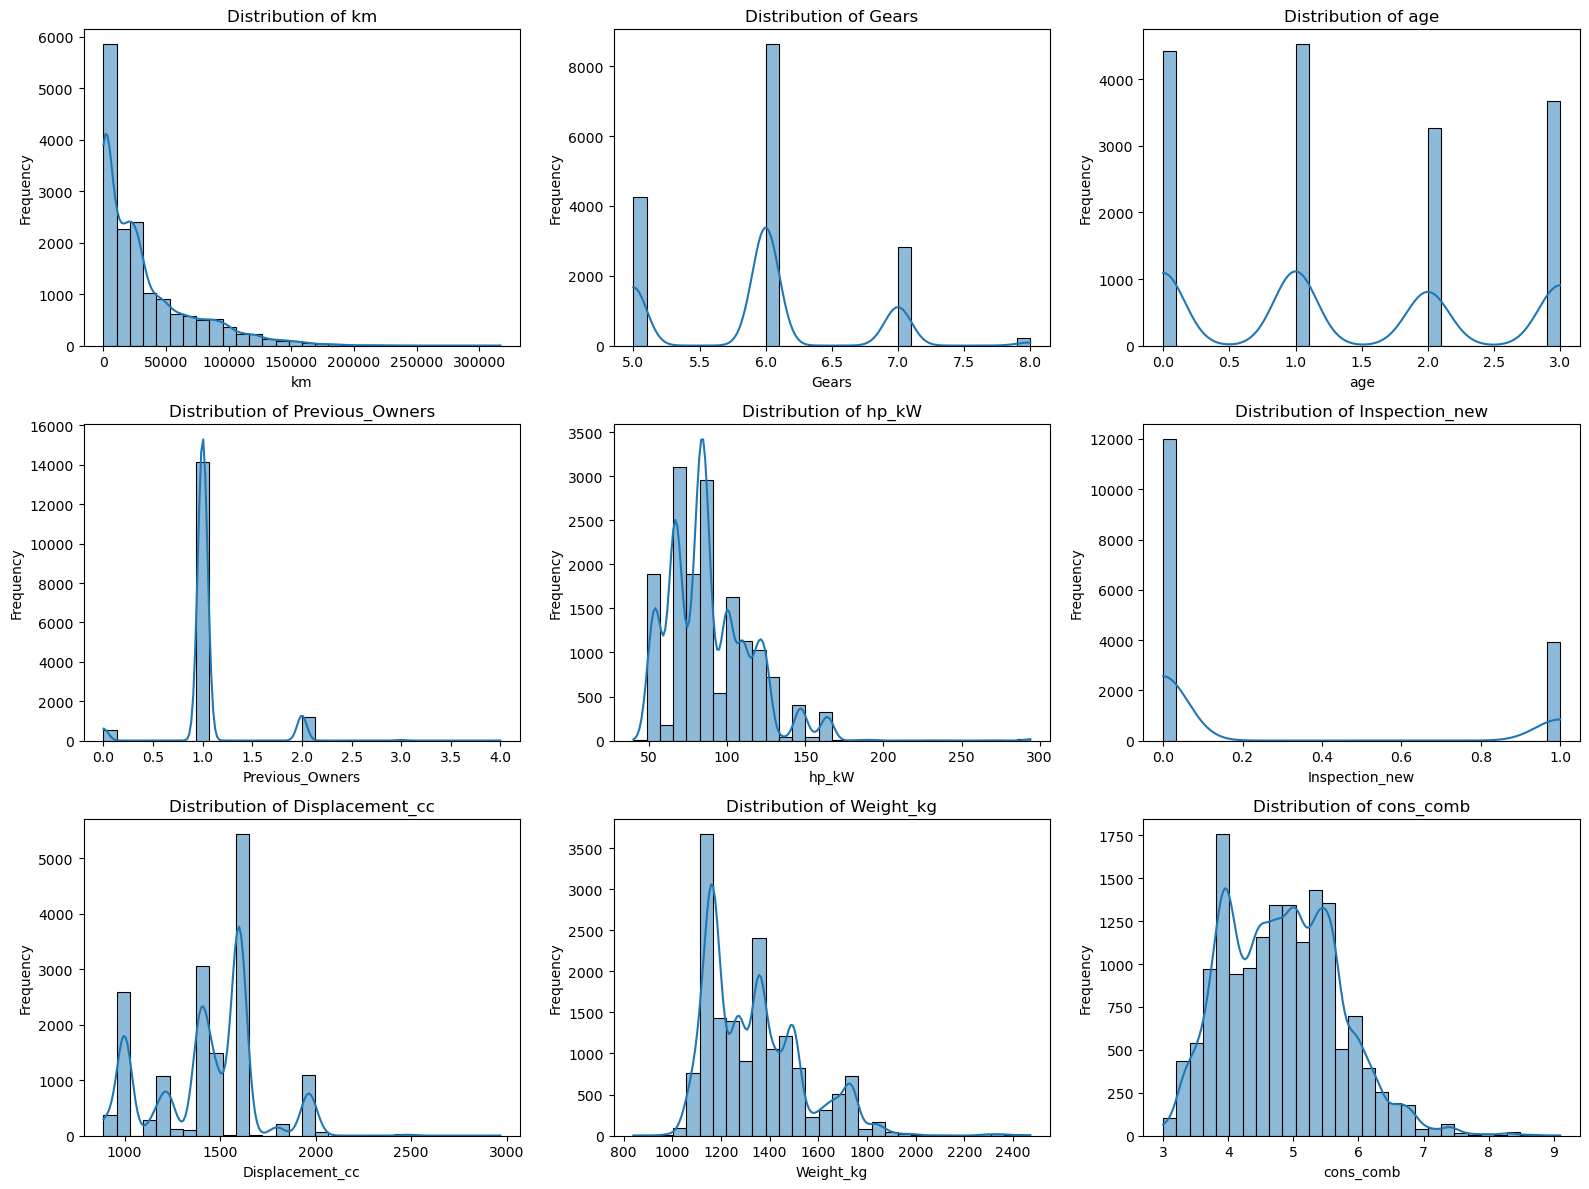

In [82]:
# Identify numerical features and plot histograms

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)  # adjust grid based on number of features
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **2.1.3** <font color =red> [3 marks] </font>
Identify categorical predictors and plot their frequency distributions.

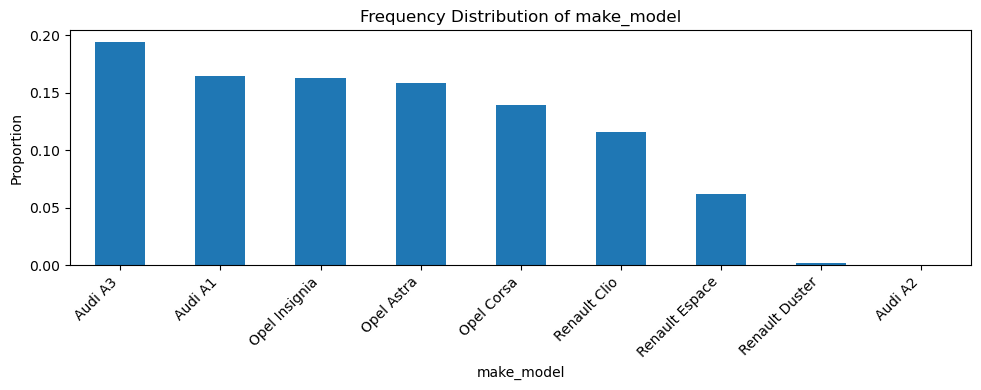

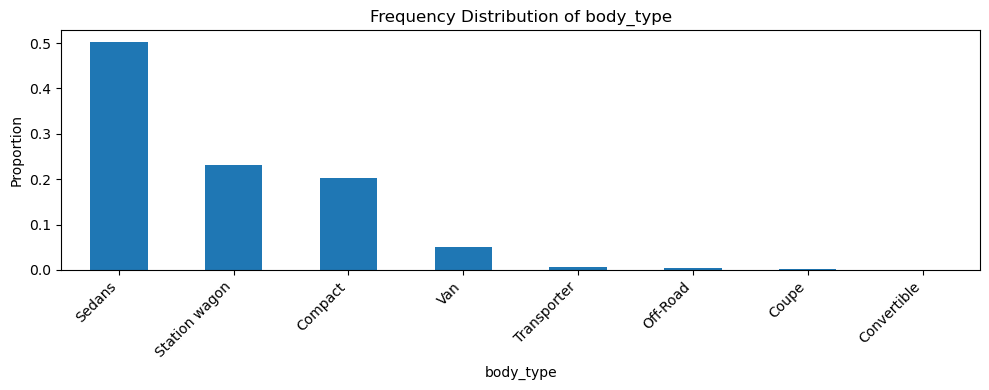

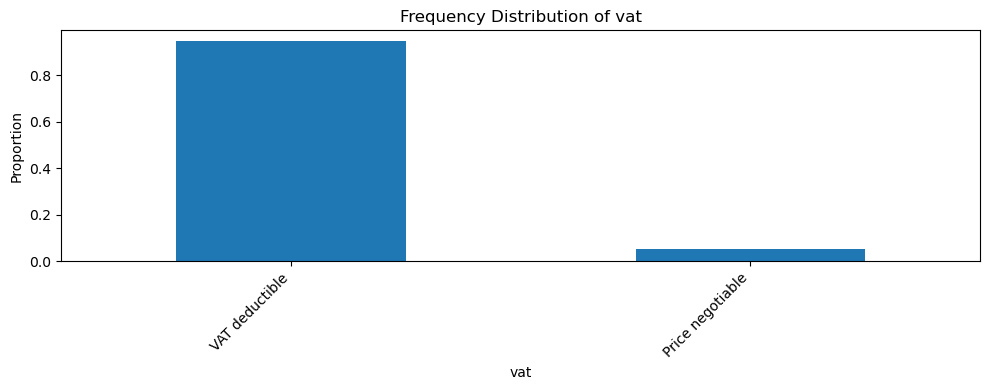

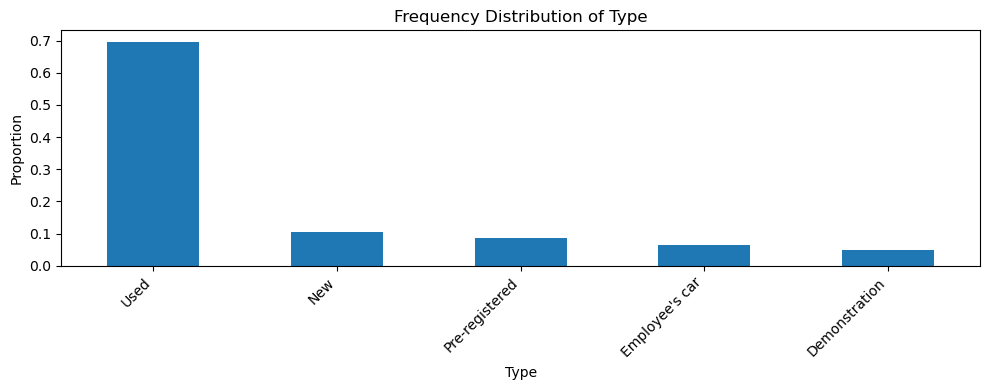

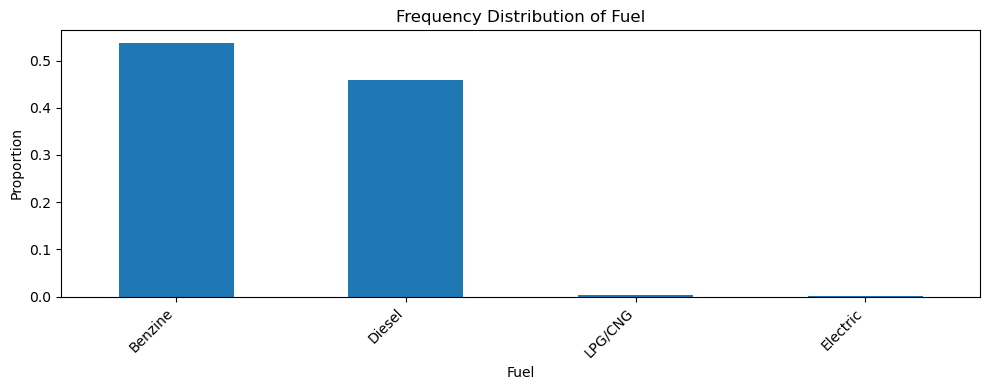

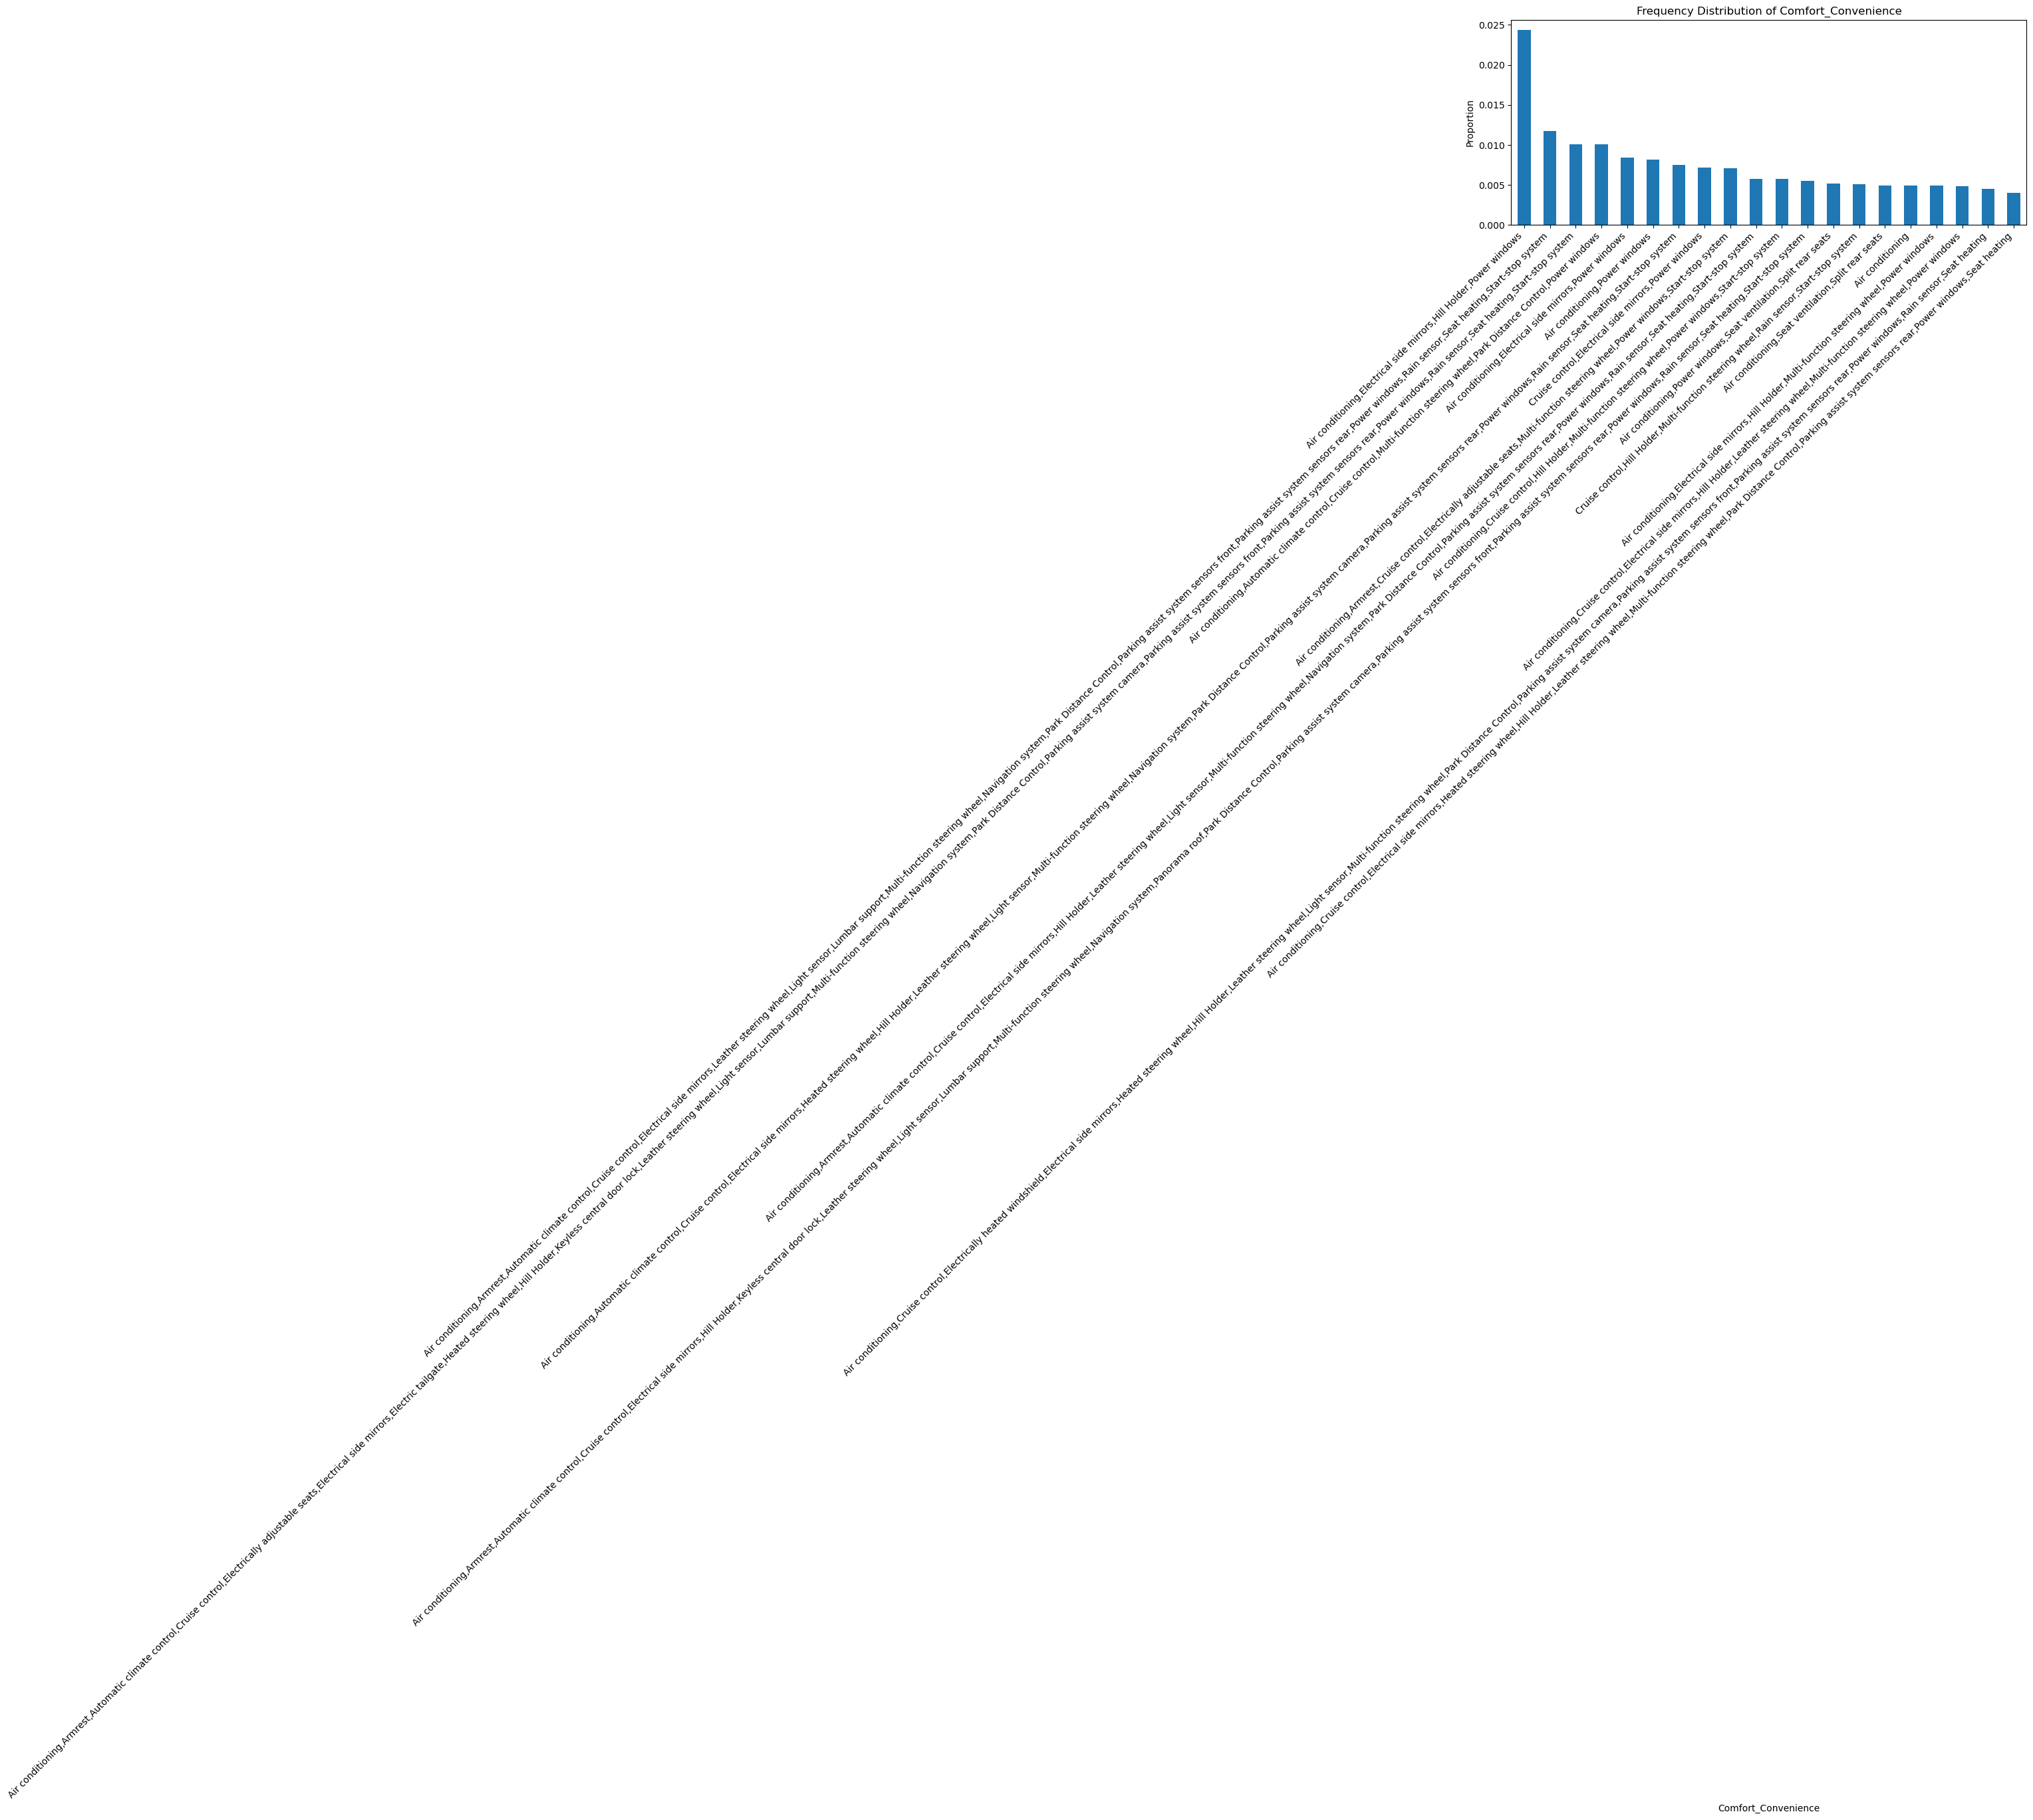

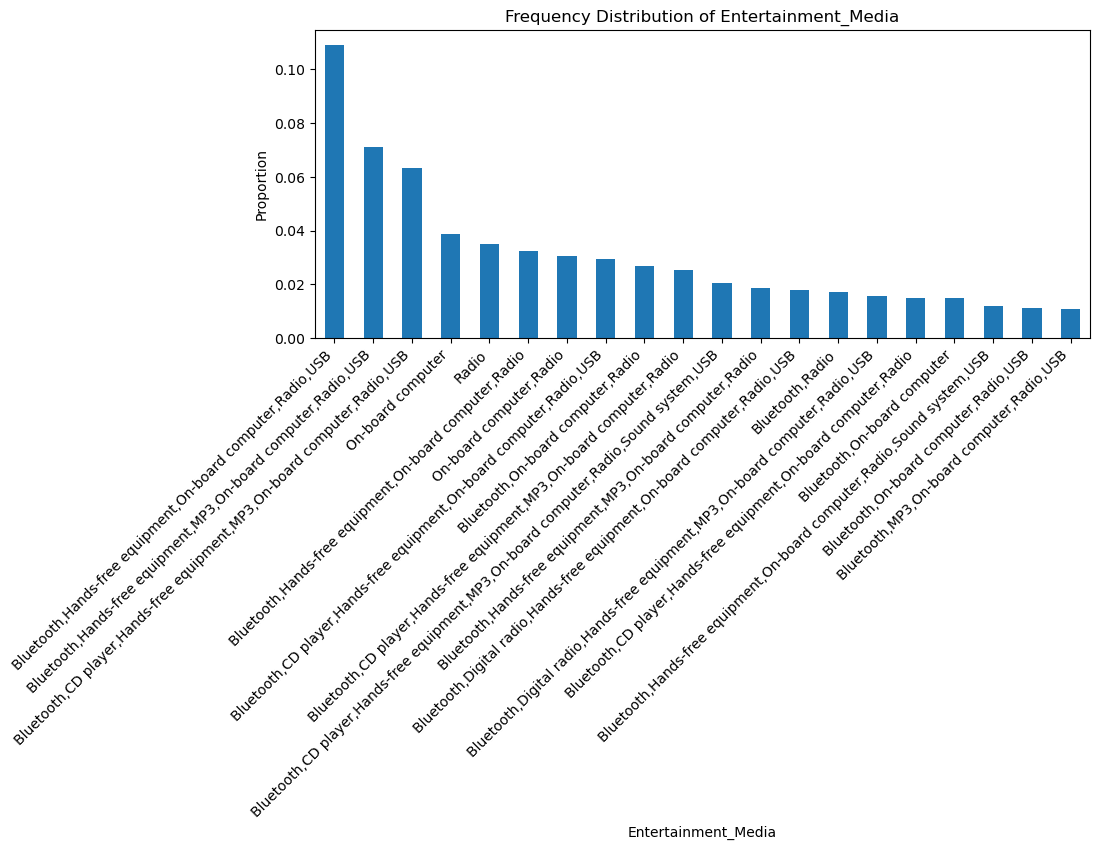

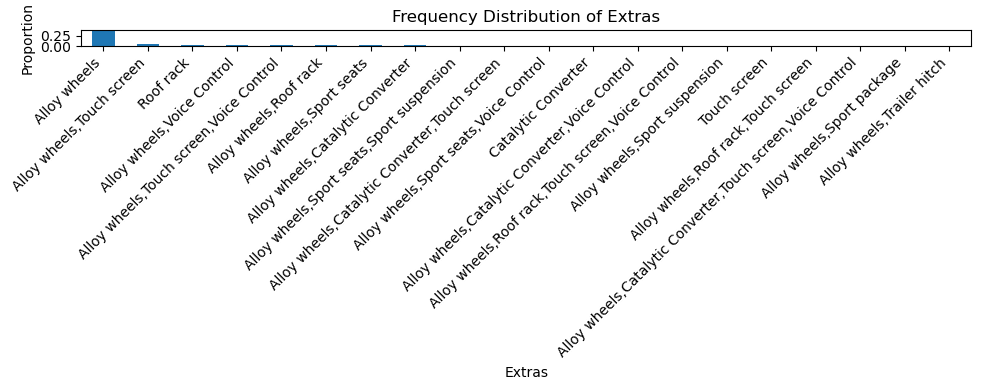

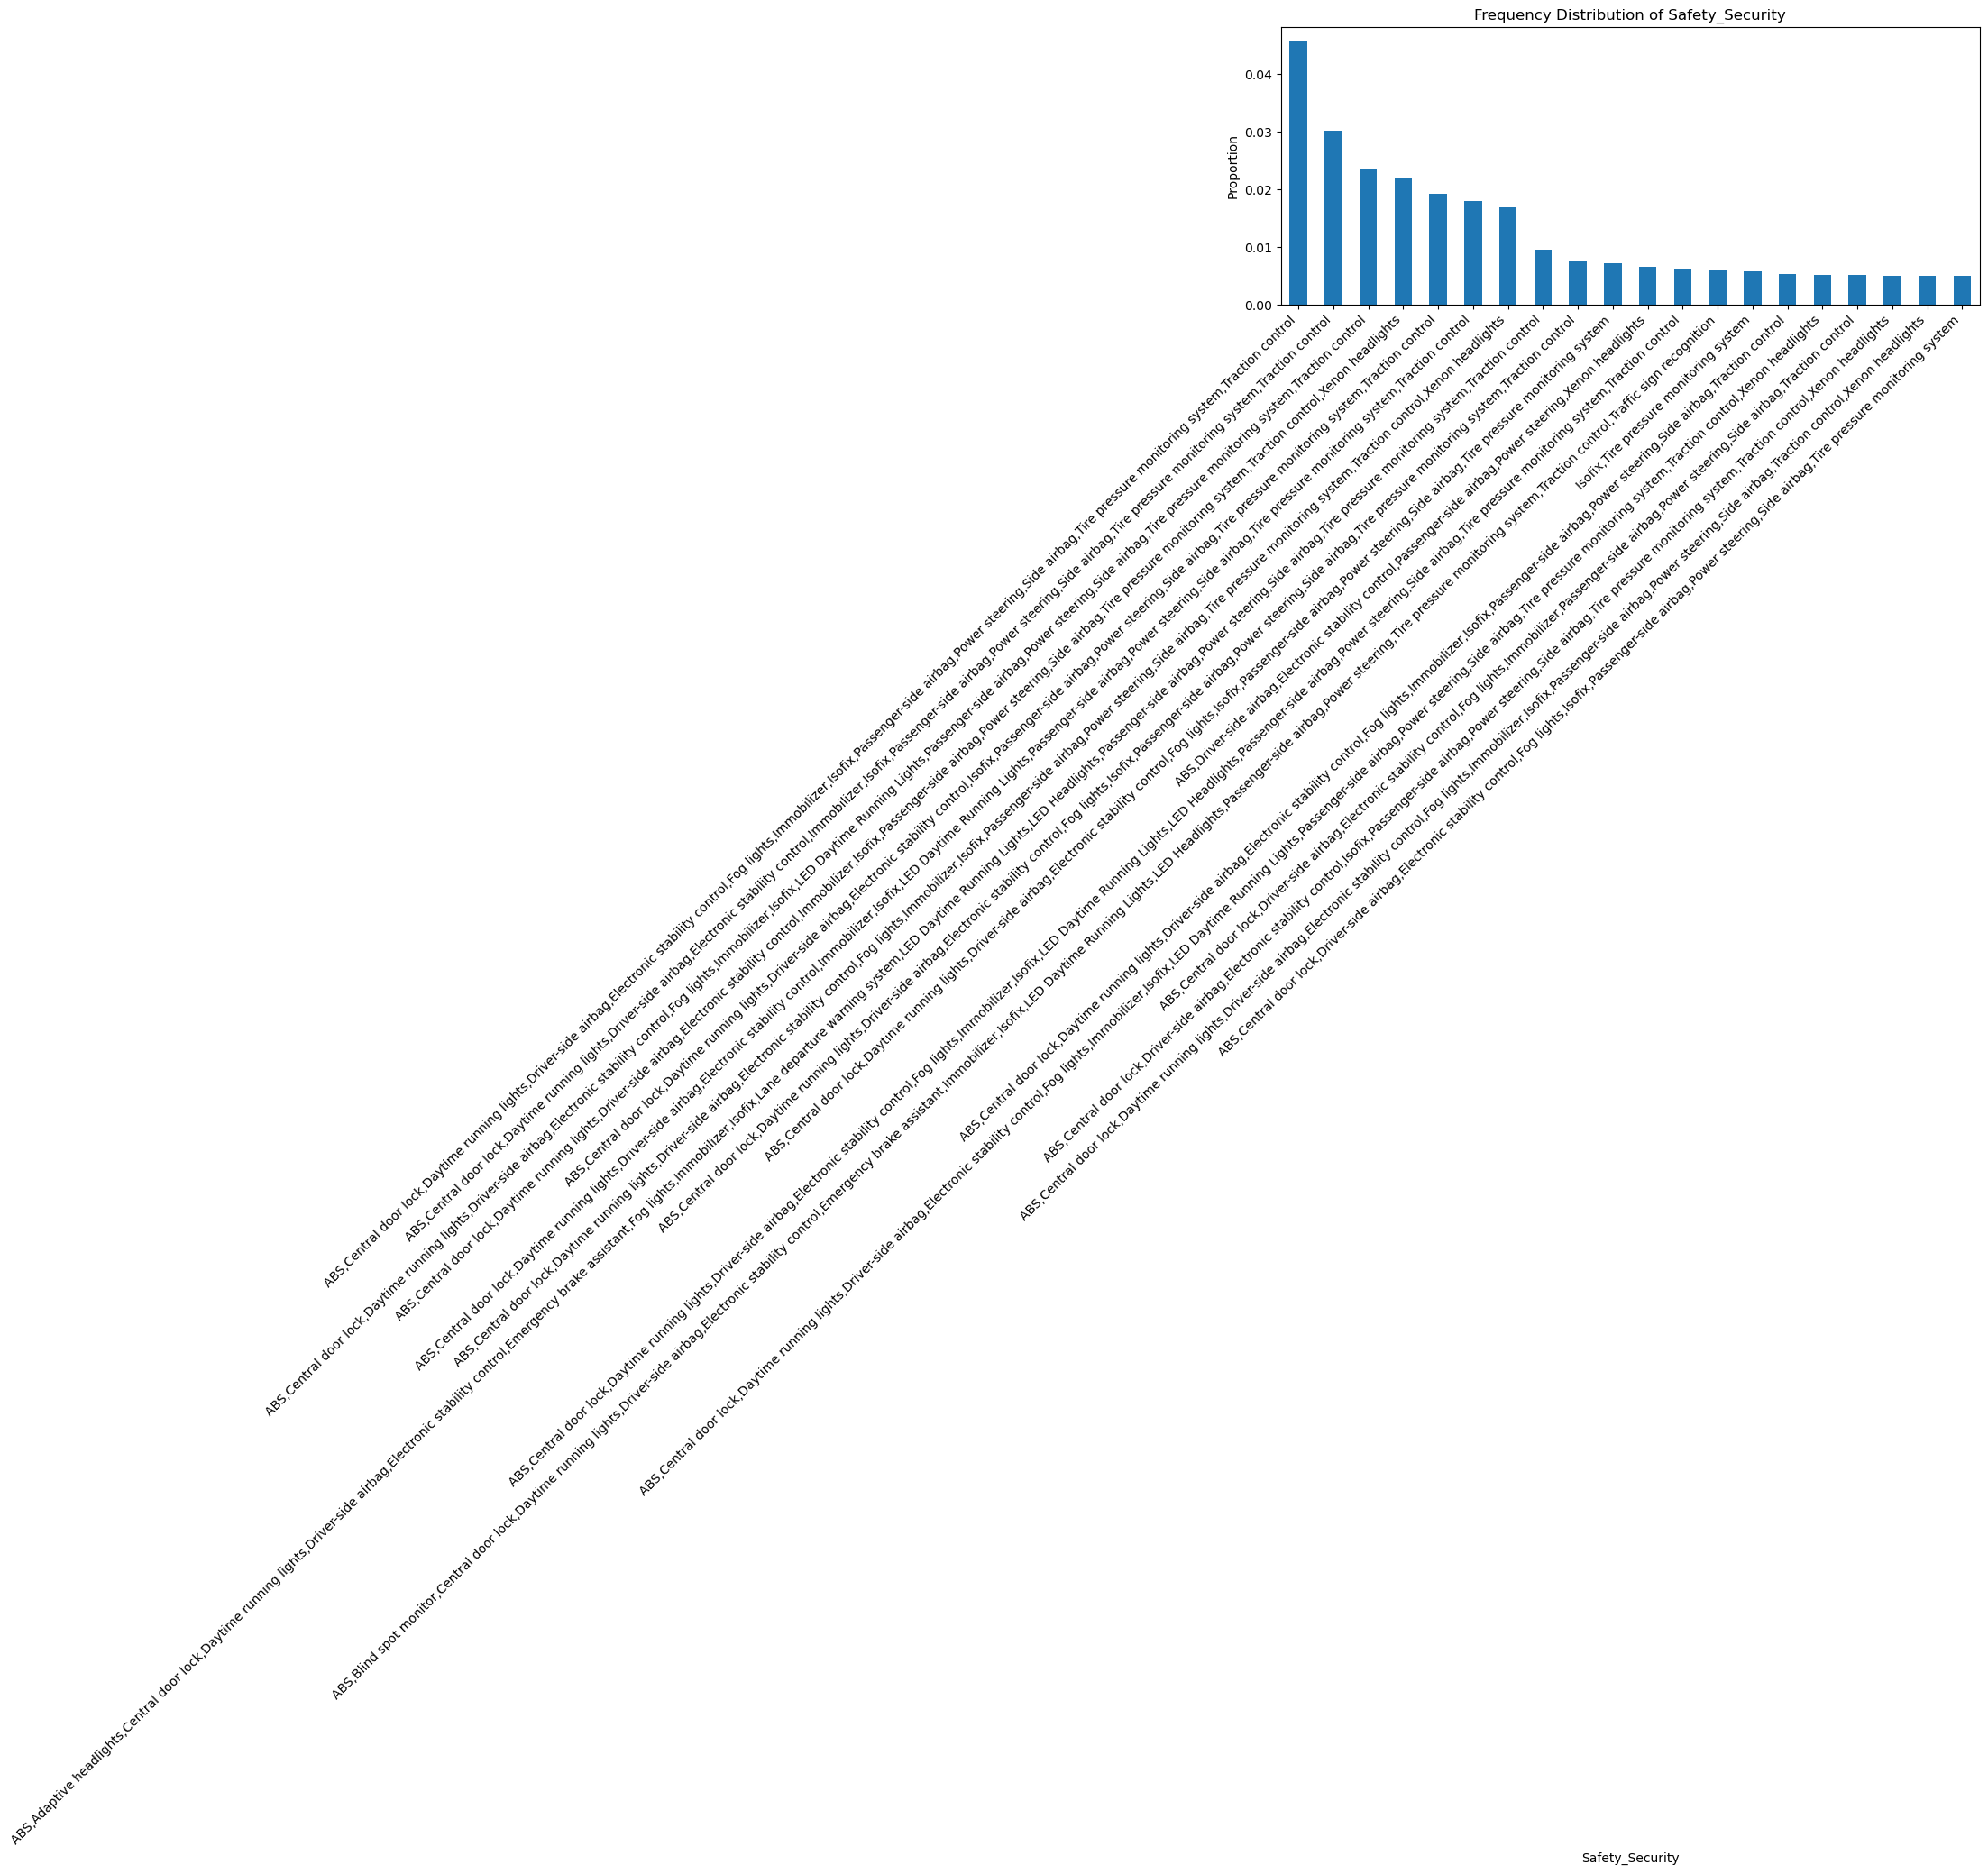

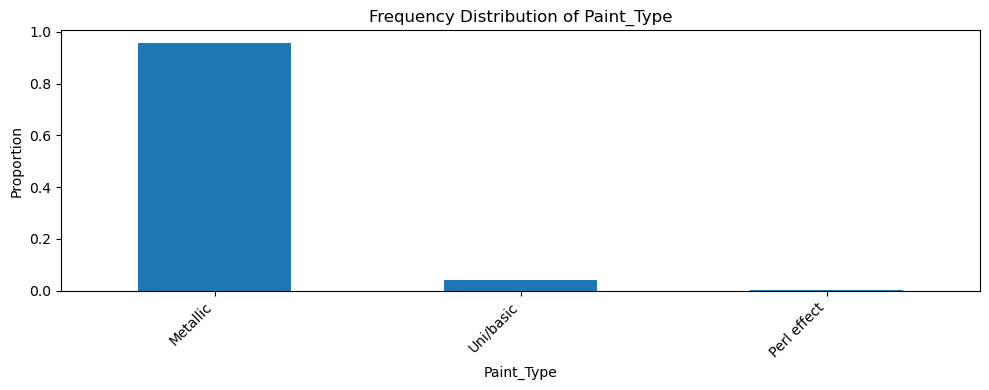

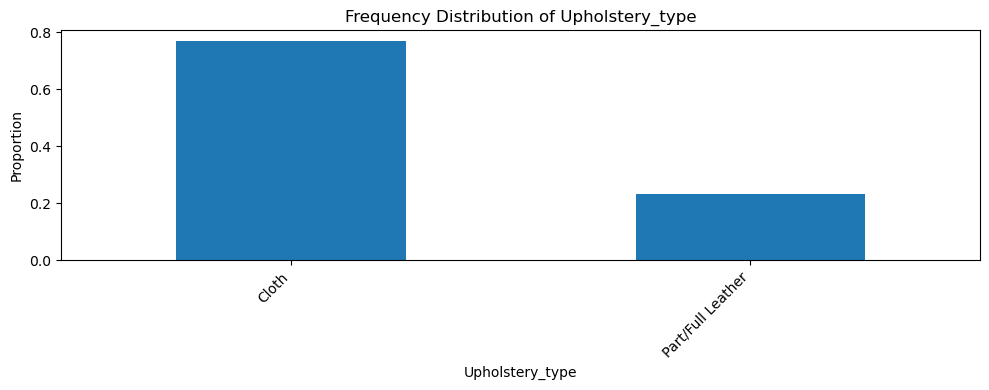

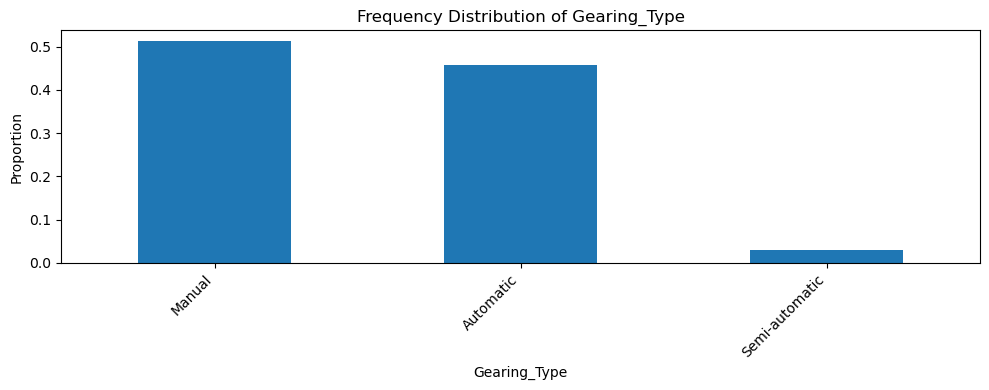

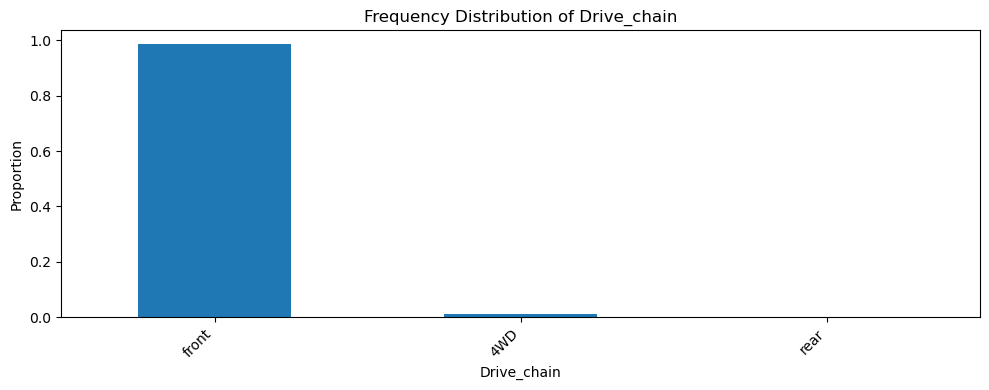

In [84]:
# Identify categorical columns and check their frequency distributions

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    df[col].value_counts(normalize=True).head(20).plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f"{col}_frequency.png")
    plt.tight_layout()
    plt.show()

**Note**: Look carefully at the values stored in columns `["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"]`.

Should they be considered categorical? Should they be dropped or handled any other way?

#### **2.1.4** <font color =red> [3 marks] </font>
Fix columns with low frequency values and class imbalances.

Some information regarding values in the `Type` column that may help:
- *'Pre-registered'* cars are ones which have already been registered previously by the seller.
- *'New'* cars are not necessarily new cars, but new-like cars. These might also have multiple owners due to multiple pre-registrations as well.
- *'Employee's car'* are cars used by employees over a short period of time and small distance.
- *'Demonstration'* cars are used for trial purposes and also driven for a short time and distance.

Based on these, you can handle this particular column. For other columns, decide a strategy on your own.

In [88]:
# Fix columns as needed

# Step 1: Clean 'Type' column based on business logic
df['Type'] = df['Type'].replace({
    "Pre-registered": "Used",
    "Employee's car": "Used",
    "Demonstration": "Used",
    "New": "Used"
})

# Step 2: Check low frequency categories in other categorical columns
threshold = 0.01  # categories with less than 1% frequency will be grouped as 'Other'
for col in categorical_features:
    if col != 'Type':  # already handled above
        freq = df[col].value_counts(normalize=True)
        low_freq_cats = freq[freq < threshold].index
        if len(low_freq_cats) > 0:
            df[col] = df[col].replace(low_freq_cats, 'Other')

# Step 3: Check the final value counts of 'Type' and other columns
print("Updated 'Type' column value counts:")
print(df['Type'].value_counts(normalize=True))

print("\nOther categorical columns with grouped low frequency values handled.")

Updated 'Type' column value counts:
Type
Used   1.000
Name: proportion, dtype: float64

Other categorical columns with grouped low frequency values handled.


#### **2.1.5** <font color =red> [3 marks] </font>
Identify target variable and plot the frequency distributions. Apply necessary transformations.

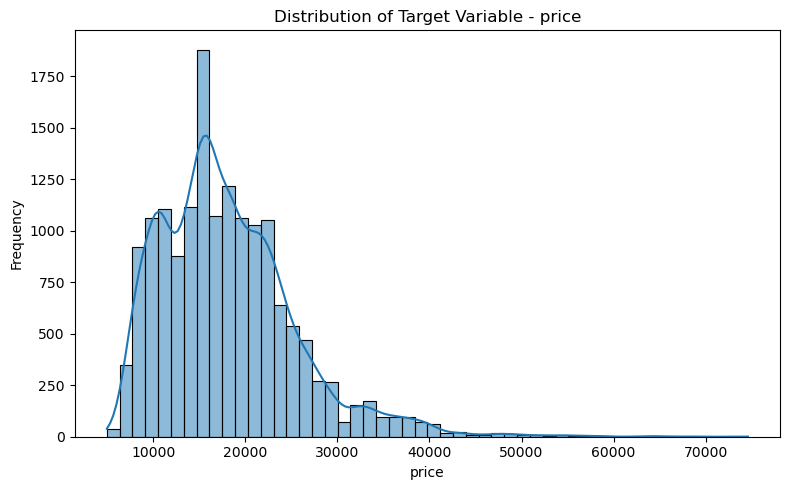

Skewness of price: 1.24


In [90]:
# Plot histograms for target feature

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Target Variable - price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Check skewness
skew_val = df['price'].skew()
print(f"Skewness of price: {skew_val:.2f}")

**The target variable seems to be skewed. Perform suitable transformation on the target.**

Log transformation applied to 'price'.


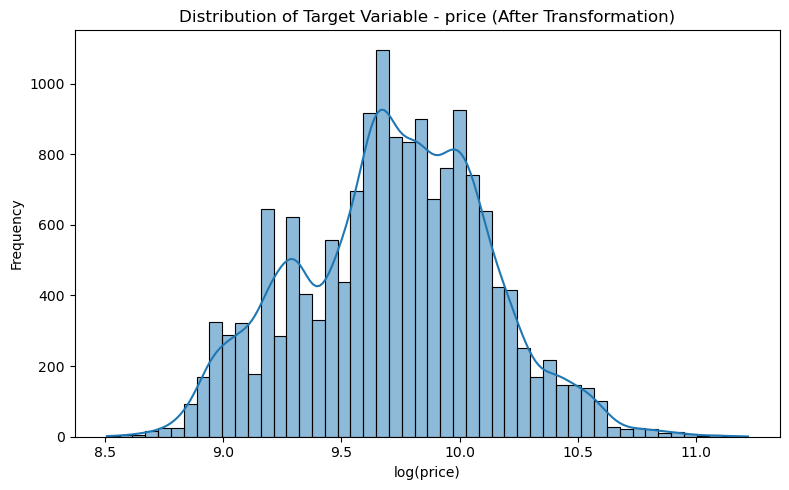

In [92]:
# Transform the target feature

if skew_val > 1:
    df['price'] = np.log1p(df['price'])
    print("Log transformation applied to 'price'.")
else:
    print("No transformation required.")

# Plot after transformation (for confirmation)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Target Variable - price (After Transformation)')
plt.xlabel('log(price)' if skew_val > 1 else 'price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **2.2 Correlation analysis** <font color = red> [6 marks] </font>

#### **2.2.1** <font color =red> [3 marks] </font>
Plot the correlation map between features and target variable.

Correlation of numerical features with target variable (price):
price              1.000
hp_kW              0.678
Gears              0.588
Weight_kg          0.465
Displacement_cc    0.255
cons_comb          0.211
Inspection_new     0.031
Previous_Owners   -0.152
km                -0.419
age               -0.475
Name: price, dtype: float64


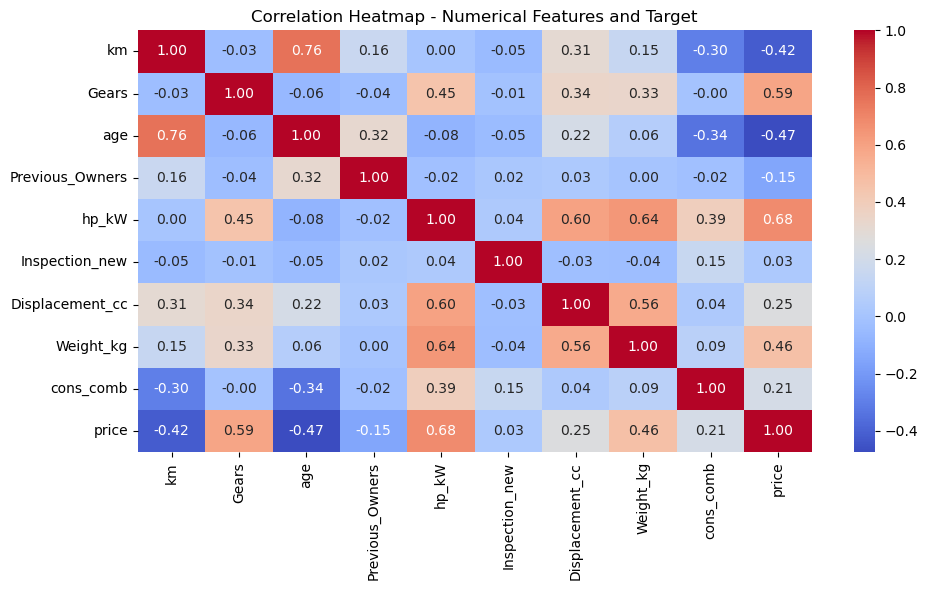

In [95]:
# Visualise correlation
# Calculate correlation of numerical features with target
corr_with_target = df[numerical_features + ['price']].corr()['price'].sort_values(ascending=False)

# Print correlation values
print("Correlation of numerical features with target variable (price):")
print(corr_with_target)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features + ['price']].corr(),
            annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap - Numerical Features and Target')
plt.tight_layout()
plt.show()

#### **2.2.2** <font color =red> [3 marks] </font>
Analyse correlation between categorical features and target variable.


Average target (price) for top categories in: make_model
make_model
Renault Espace   10.272
Audi A3           9.928
Opel Insignia     9.913
Audi A1           9.818
Opel Astra        9.626
Other             9.505
Renault Clio      9.336
Opel Corsa        9.276
Name: price, dtype: float64


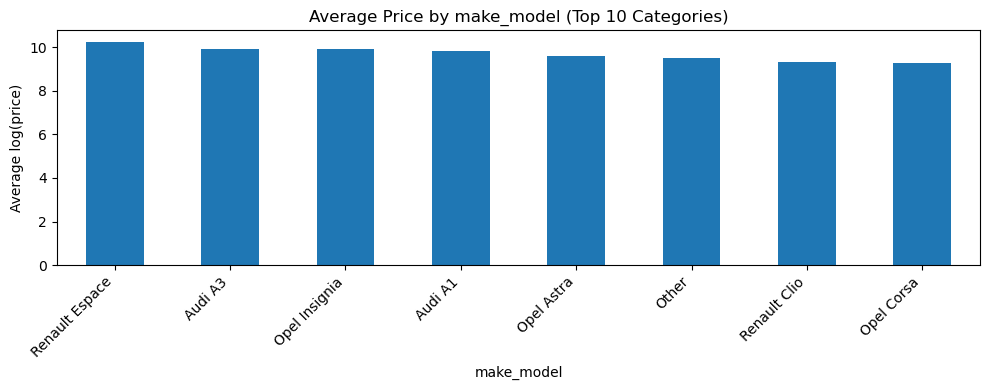


Average target (price) for top categories in: body_type
body_type
Van             10.295
Station wagon    9.753
Sedans           9.716
Other            9.623
Compact          9.556
Name: price, dtype: float64


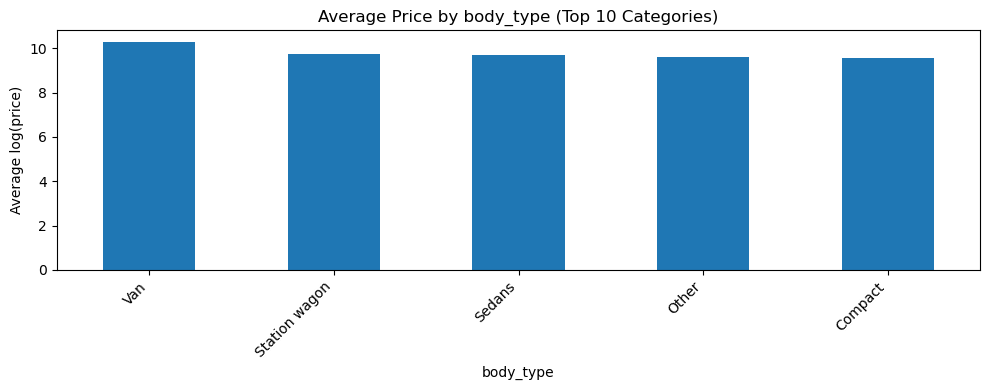


Average target (price) for top categories in: vat
vat
VAT deductible     9.730
Price negotiable   9.556
Name: price, dtype: float64


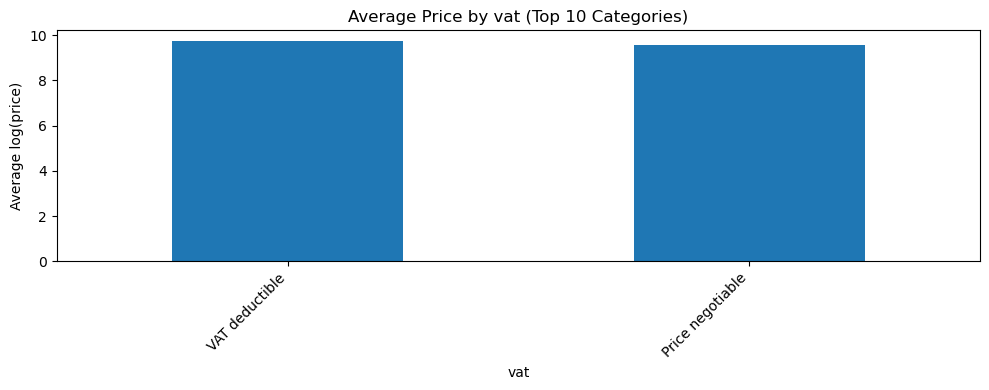


Average target (price) for top categories in: Type
Type
Used   9.721
Name: price, dtype: float64


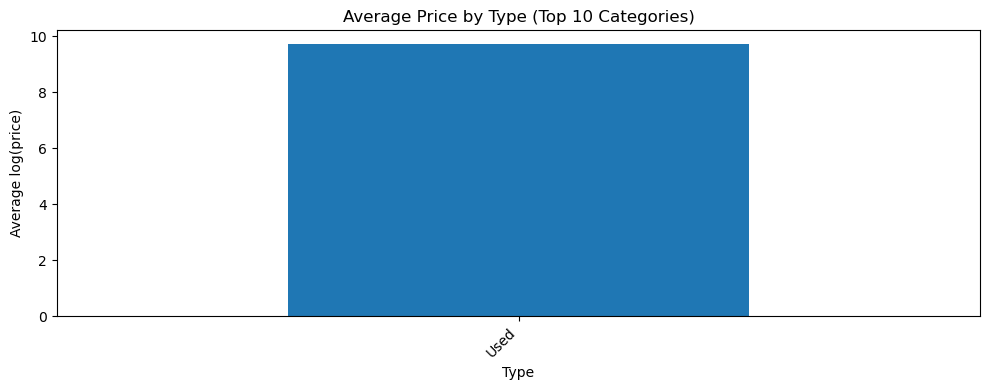


Average target (price) for top categories in: Fuel
Fuel
Diesel    9.735
Benzine   9.709
Other     9.639
Name: price, dtype: float64


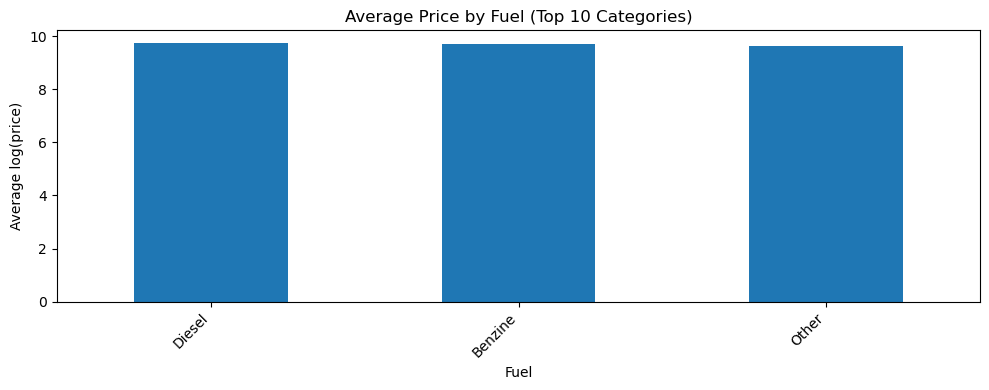


Average target (price) for top categories in: Comfort_Convenience
Comfort_Convenience
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Electric tailgate,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system   10.017
Air conditioning,Automatic climate control,Cruise control,Multi-function steering wheel,Park Distance Control,Power windows                                                                                                                                                                                                                                                                                                                 

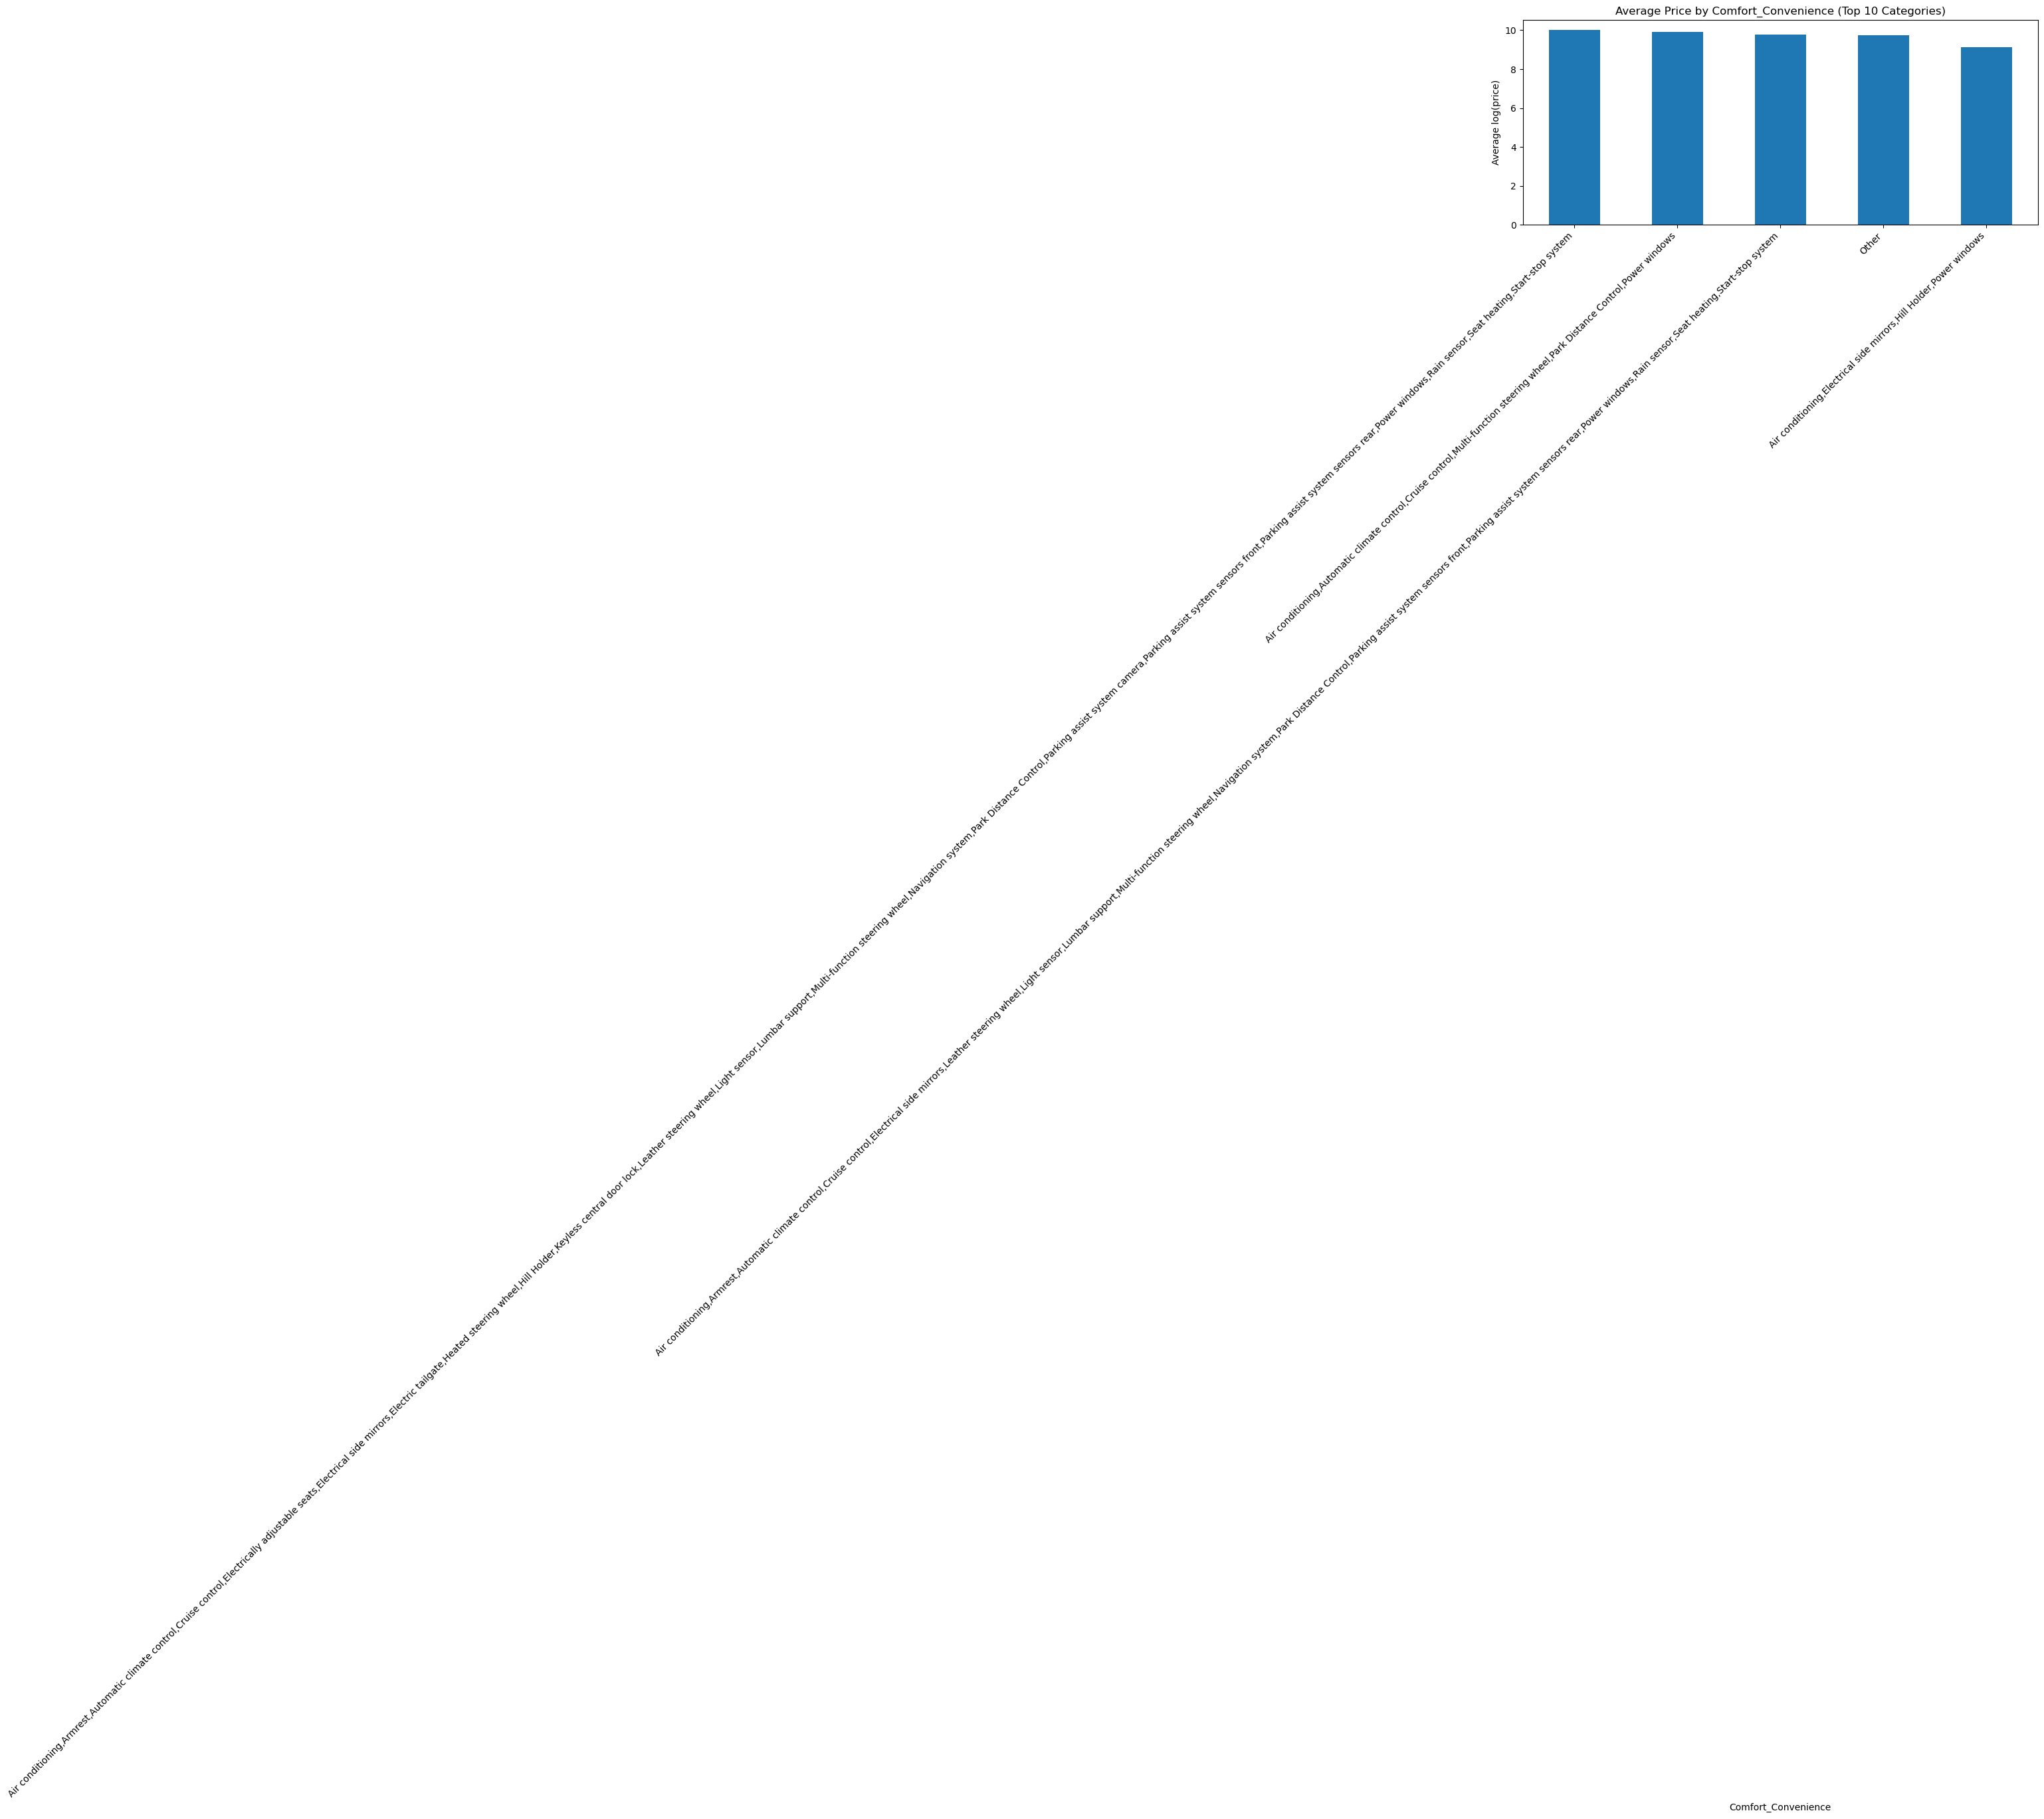


Average target (price) for top categories in: Entertainment_Media
Entertainment_Media
Bluetooth,Digital radio,Hands-free equipment,On-board computer,Radio,USB                              10.018
Bluetooth,Hands-free equipment,On-board computer,Radio                                                 9.964
Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB                           9.911
Bluetooth,Radio                                                                                        9.858
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB                  9.819
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB    9.784
Other                                                                                                  9.771
Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB                                9.744
Bluetooth,CD player,Hands-free equipment,

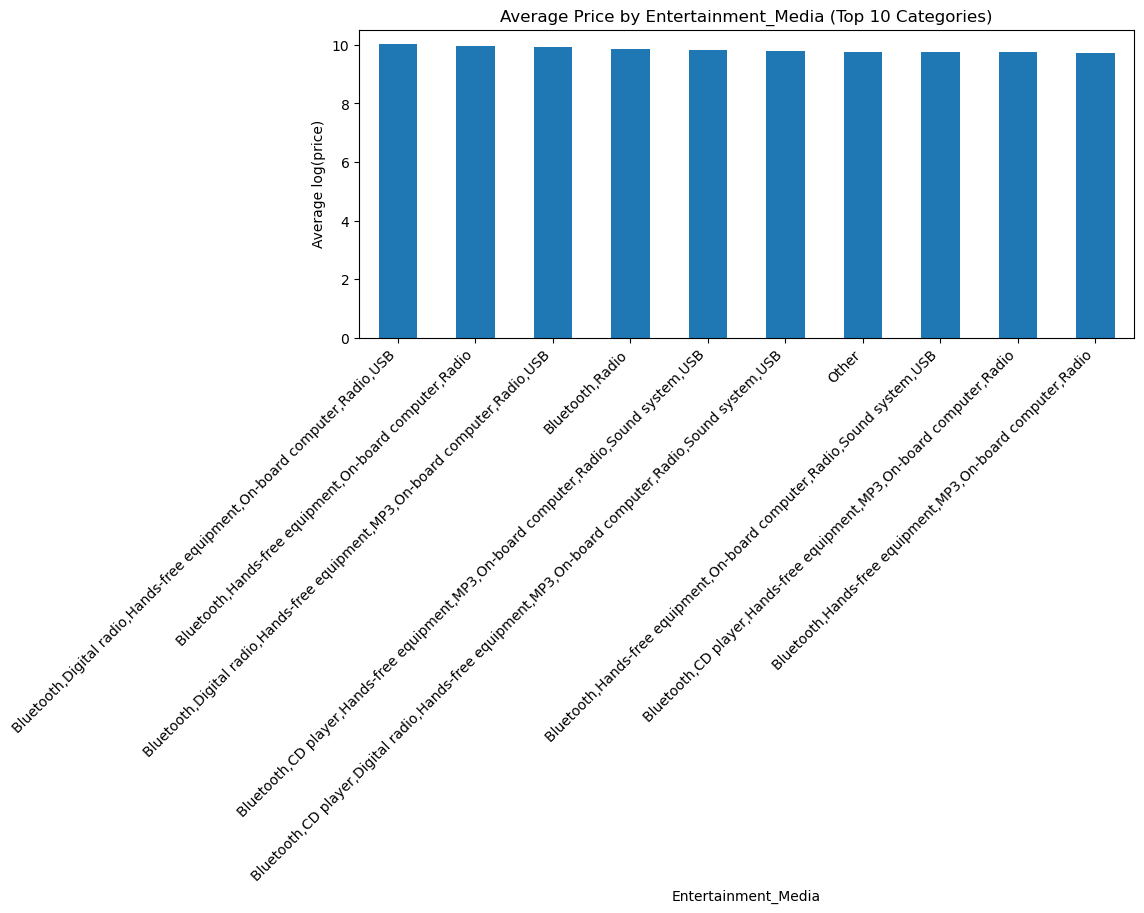


Average target (price) for top categories in: Extras
Extras
Alloy wheels,Sport suspension                       9.943
Alloy wheels,Roof rack,Touch screen,Voice Control   9.896
Alloy wheels,Catalytic Converter,Voice Control      9.892
Alloy wheels,Sport seats,Sport suspension           9.871
Alloy wheels,Roof rack                              9.837
Alloy wheels,Touch screen,Voice Control             9.831
Alloy wheels,Touch screen                           9.826
Alloy wheels,Catalytic Converter,Touch screen       9.813
Other                                               9.808
Alloy wheels,Sport seats                            9.794
Name: price, dtype: float64


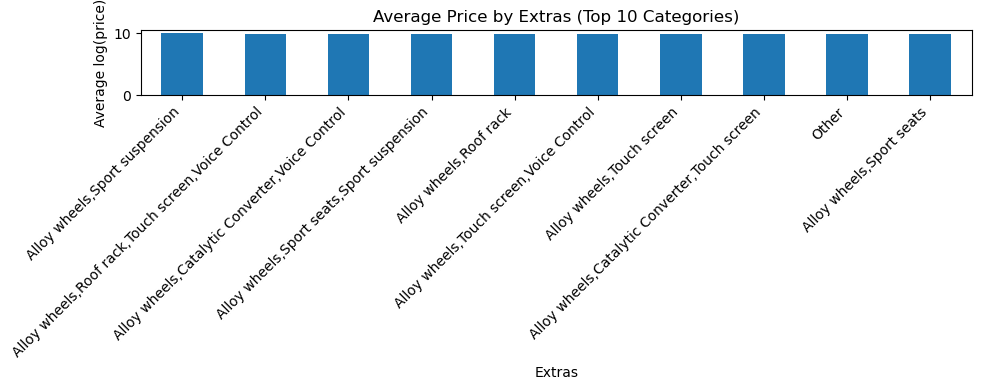


Average target (price) for top categories in: Safety_Security
Safety_Security
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights                        9.930
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights             9.775
Other                                                                                                                                                                                                                                                     9.756
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Pas

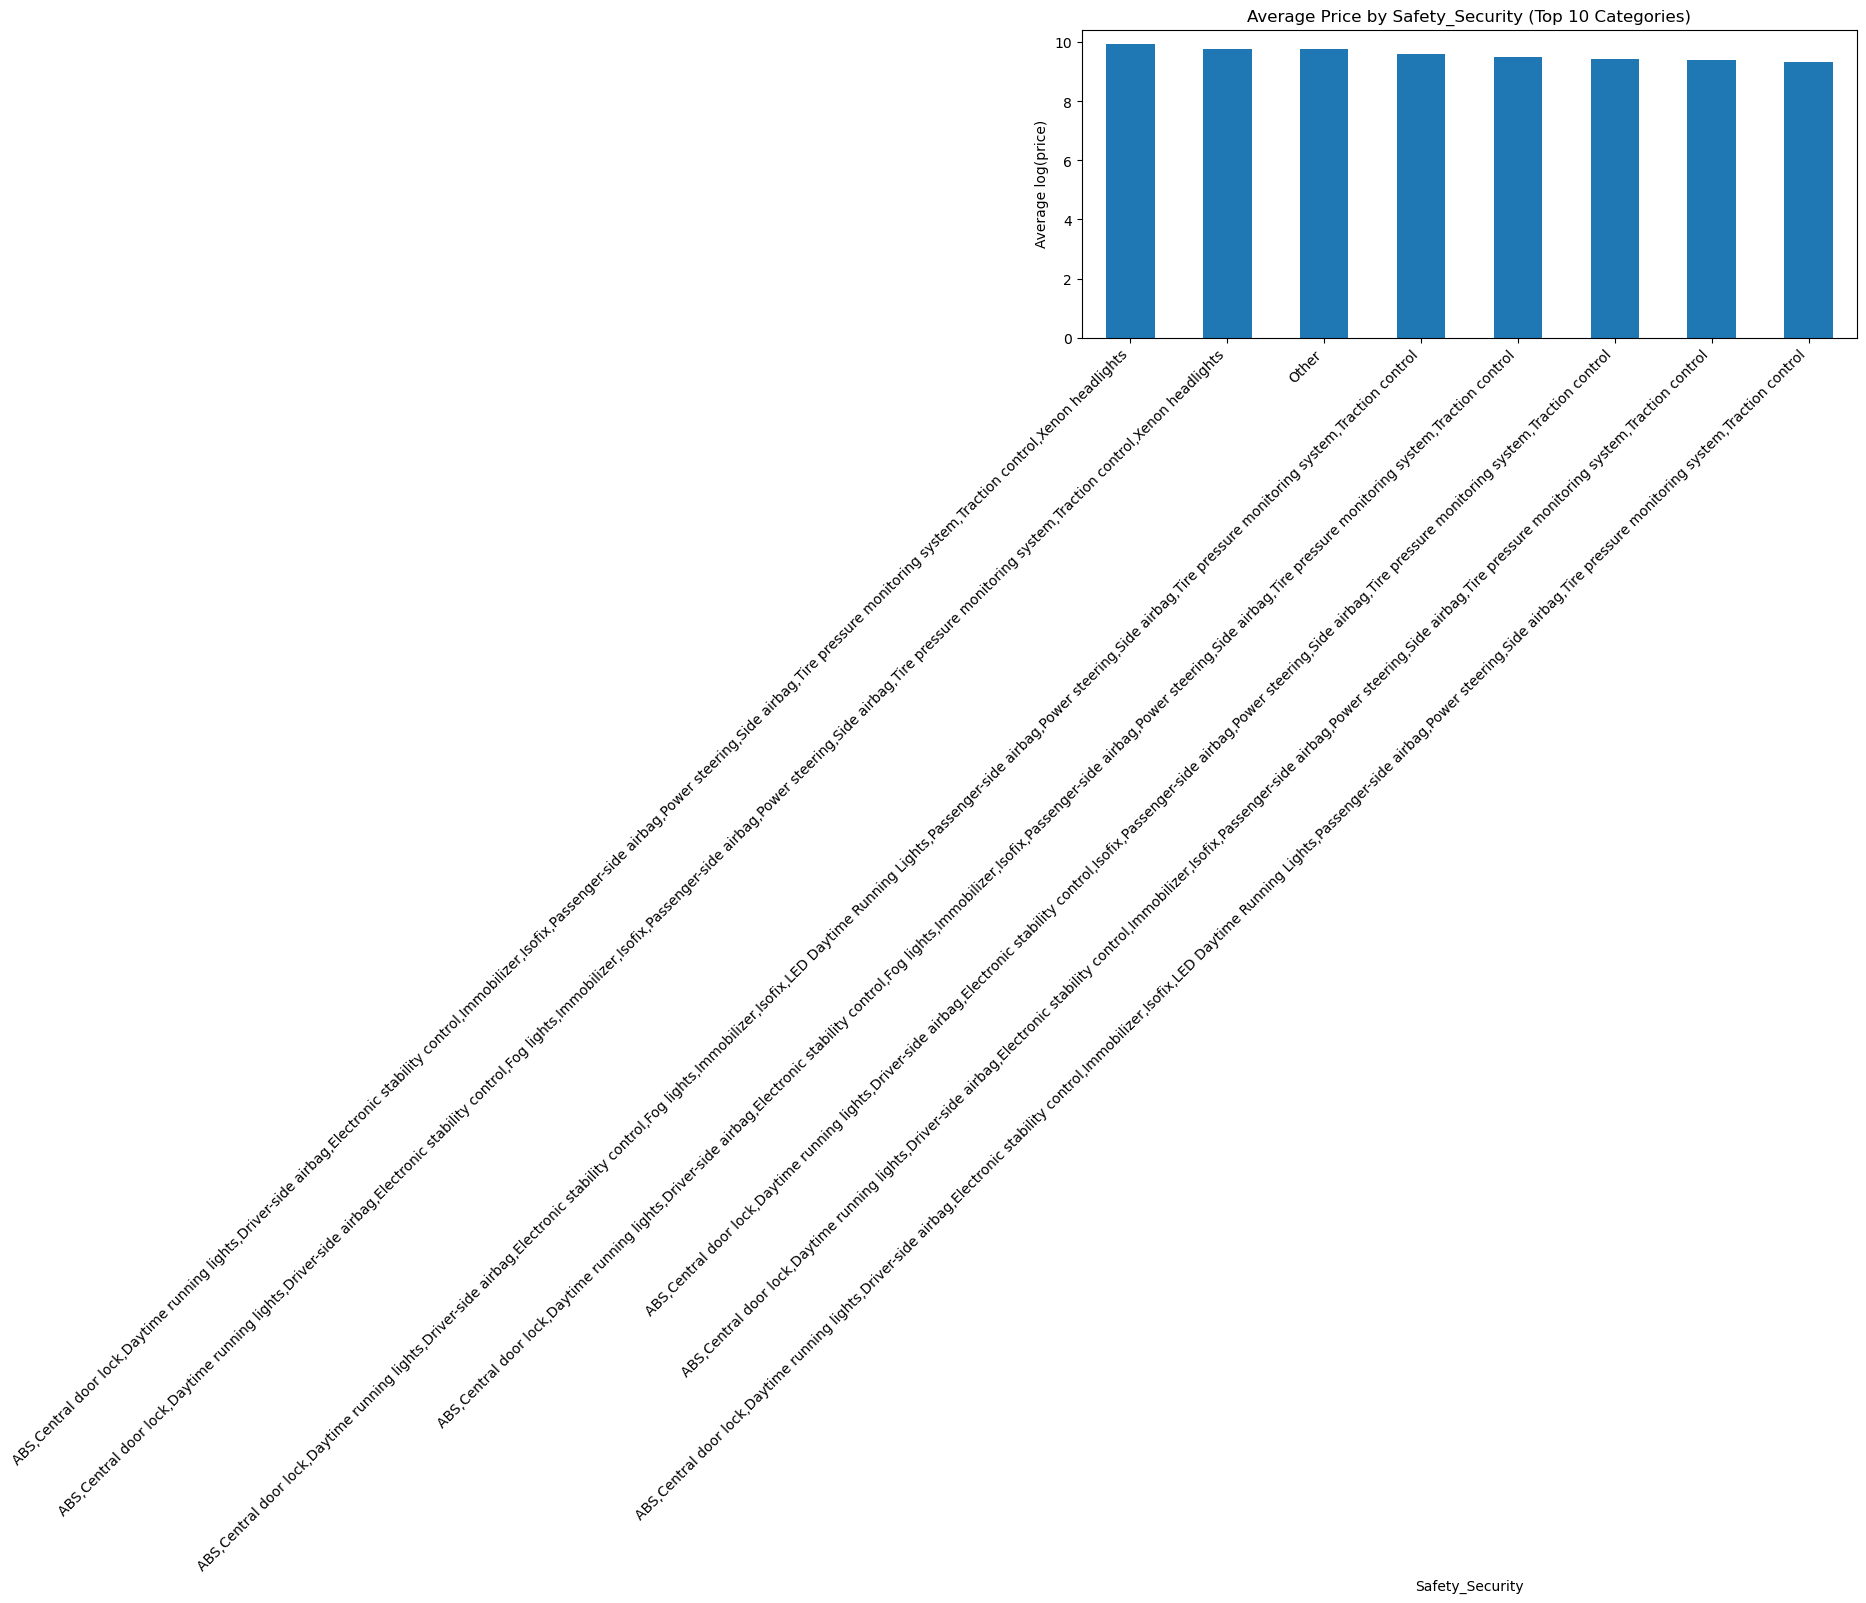


Average target (price) for top categories in: Paint_Type
Paint_Type
Metallic    9.725
Uni/basic   9.639
Other       9.145
Name: price, dtype: float64


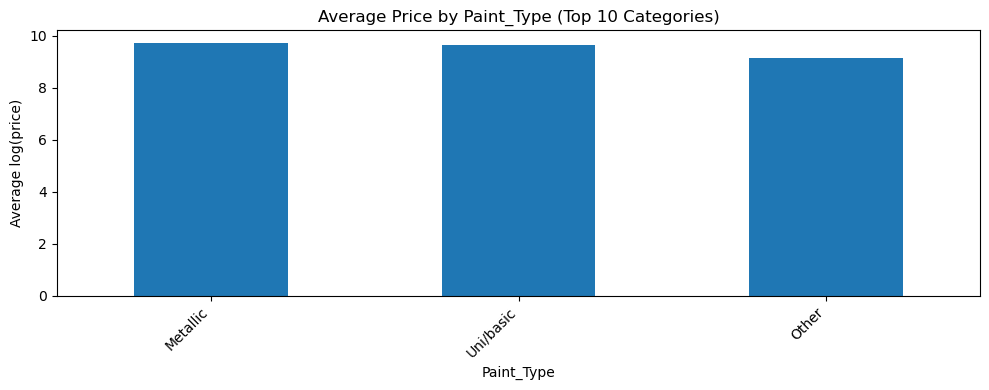


Average target (price) for top categories in: Upholstery_type
Upholstery_type
Part/Full Leather   9.981
Cloth               9.642
Name: price, dtype: float64


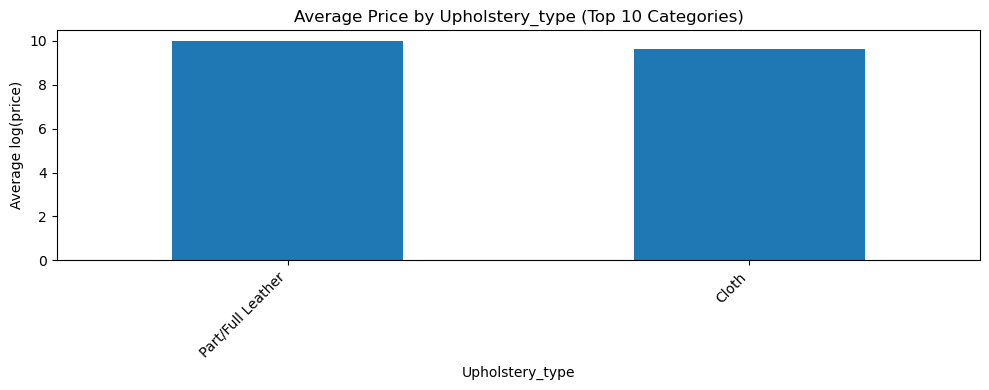


Average target (price) for top categories in: Gearing_Type
Gearing_Type
Semi-automatic   9.972
Automatic        9.906
Manual           9.540
Name: price, dtype: float64


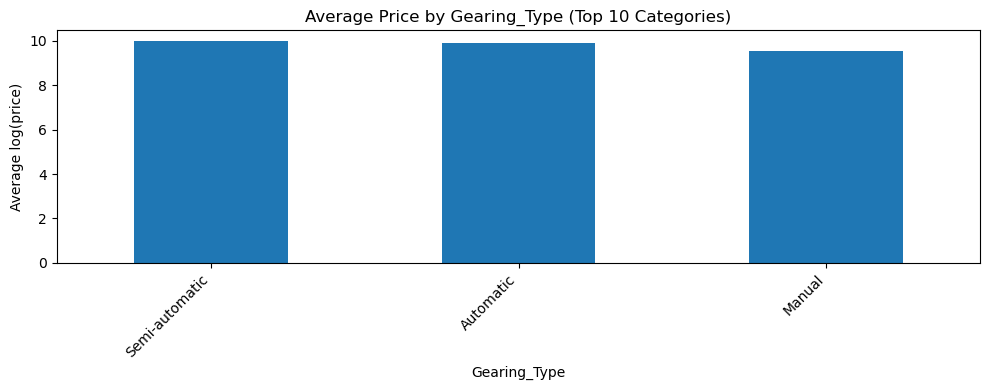


Average target (price) for top categories in: Drive_chain
Drive_chain
4WD     10.133
front    9.715
Other    9.606
Name: price, dtype: float64


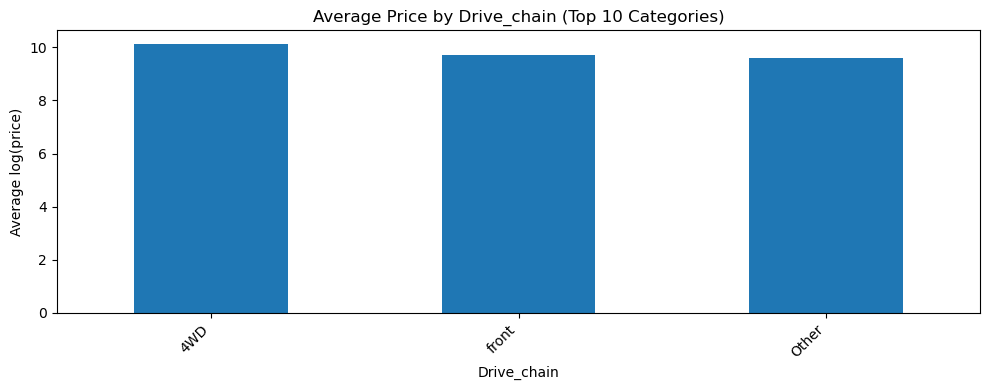

In [97]:
# Comparing average values of target for different categories
for col in categorical_features:
    avg_price = df.groupby(col)['price'].mean().sort_values(ascending=False).head(10)
    print(f"\nAverage target (price) for top categories in: {col}")
    print(avg_price)

    plt.figure(figsize=(10, 4))
    avg_price.plot(kind='bar')
    plt.title(f'Average Price by {col} (Top 10 Categories)')
    plt.xlabel(col)
    plt.ylabel('Average log(price)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### **2.3 Outlier analysis** <font color = red> [5 marks] </font>

#### **2.3.1** <font color =red> [2 marks] </font>
Identify potential outliers in the data.

In [217]:
# Outliers present in each column

# Identify outliers using IQR method for each numerical feature

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = {}

for col in numerical_features:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = count

print("Outlier counts for each numerical feature:")
for k, v in outlier_counts.items():
    print(f"{k}: {v} outliers")

Outlier counts for each numerical feature:
km: 689 outliers
Gears: 225 outliers
age: 0 outliers
Previous_Owners: 1757 outliers
hp_kW: 361 outliers
Inspection_new: 3932 outliers
Displacement_cc: 21 outliers
Weight_kg: 87 outliers
cons_comb: 125 outliers


#### **2.3.2** <font color =red> [3 marks] </font>
Handle the outliers suitably.

In [219]:
# Handle outliers
# Handle outliers using IQR capping (winsorization)

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print("Outliers have been handled using IQR capping.")

Outliers have been handled using IQR capping.


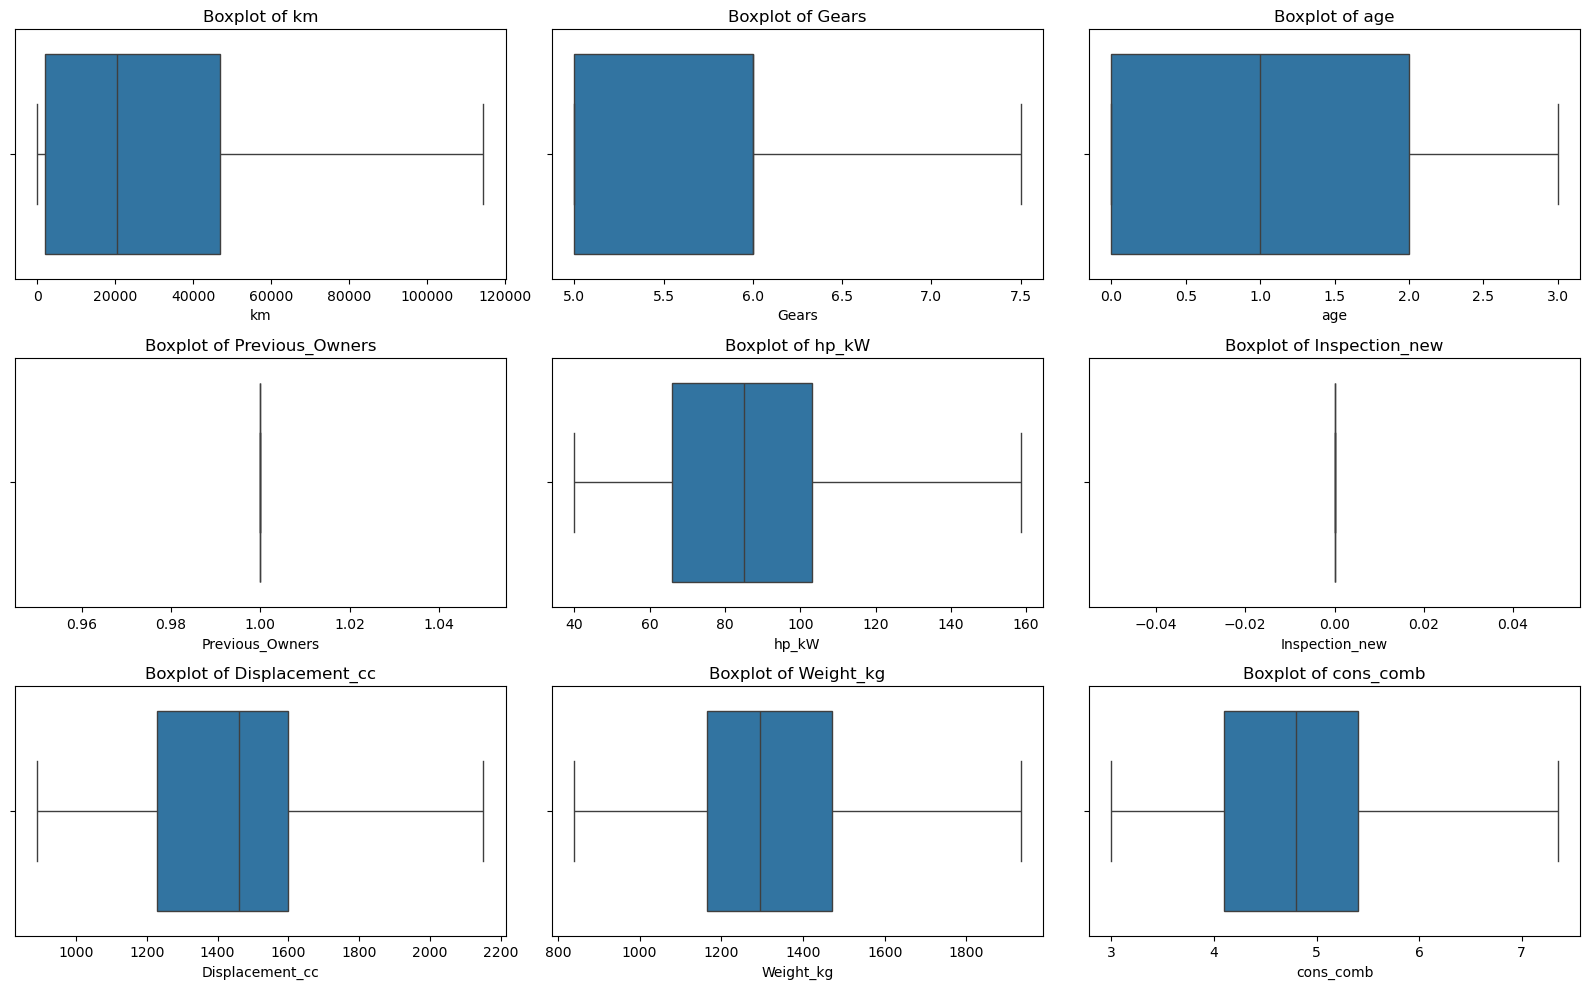

In [221]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### **2.4 Feature Engineering** <font color = red> [11 marks] </font>

#### **2.4.1**
Fix any redundant columns and create new ones if needed.

In [225]:
# Fix/create columns as needed

# Check columns to identify redundancy
print("Unique value counts for key columns:")
print(df[['make_model', 'body_type', 'Type', 'Fuel']].nunique())

# Example: drop columns if redundant or not useful for modeling
# (You can adjust based on your EDA observations)
redundant_cols = ['vat']   # 'vat' may not contribute to price prediction directly
df.drop(columns=redundant_cols, inplace=True)

# Create any useful derived features
# Example 1: Power to weight ratio
df['power_to_weight'] = df['hp_kW'] / df['Weight_kg']

# Example 2: Age categories (optional, can help model capture non-linear effect)
df['age_category'] = pd.cut(df['age'], bins=[-1, 1, 3, 10], labels=['New', 'Mid', 'Old'])

# Verify the new columns
print("\nNew and remaining columns after feature engineering:")
print(df.columns.tolist())

Unique value counts for key columns:
make_model    8
body_type     5
Type          1
Fuel          3
dtype: int64

New and remaining columns after feature engineering:
['make_model', 'body_type', 'price', 'km', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb', 'power_to_weight', 'age_category']


#### **2.4.2** <font color =red> [4 marks] </font>
Analysis and feature engineering on `['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']`.

These columns contains lists of features present. Decide on how to include these features in the predictors.

In [231]:
# Check unique values in each feature spec column
for col in ['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security']:
    print(f"\nUnique values in {col} (sample):")
    print(df[col].head(10).tolist())


Unique values in Comfort_Convenience (sample):
['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system']

Unique values in Entertainment_Media (sample):
['Bluetooth,Hands-free equipment,On-board computer,Radio', 'Other', 'Other', 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB', 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB', 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB', 'Other', 'Other', 'Radio', 'Radio']

Unique values in Extras (sample):
['Alloy wheels,Catalytic Converter,Voice Control', 'Other', 'Alloy wheels,Voice Control', 'A

Out of these features, we will check the ones which are present in most of the cars or are absent from most of the cars. These kinds of features can be removed as they just increase the dimensionality without explaining the variance.

In [233]:
# Drop features from df
df.drop(columns=['Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security'], inplace=True)

print("Specification columns dropped after feature analysis.")
print("Current shape of df:", df.shape)

Specification columns dropped after feature analysis.
Current shape of df: (15915, 20)


#### **2.4.3** <font color =red> [3 marks] </font>
Perform feature encoding.

In [237]:
# Encode features

# Identify categorical columns again after previous feature engineering steps
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", cat_cols)

# Apply one-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Feature encoding completed.")
print("Current shape of df:", df.shape)


Categorical columns to encode: []
Feature encoding completed.
Current shape of df: (15915, 32)


#### **2.4.4** <font color =red> [2 marks] </font>
Split the data into training and testing sets.

In [239]:
# Split data

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split completed.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split completed.
X_train shape: (12732, 31)
X_test shape: (3183, 31)
y_train shape: (12732,)
y_test shape: (3183,)


#### **2.4.5** <font color =red> [2 marks] </font>
Scale the features.

In [243]:
# Scale features

from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Scale only numeric columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Feature scaling completed.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Feature scaling completed.
X_train_scaled shape: (12732, 31)
X_test_scaled shape: (3183, 31)


## **3 Linear Regression Models** <font color =red> [35 marks] </font>


### **3.1 Baseline Linear Regression Model** <font color =red> [10 marks] </font>

#### **3.1.1** <font color =red> [5 marks] </font>
Build and fit a basic linear regression model. Perform evaluation using suitable metrics.

In [257]:
# Initialise and train model
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# One-hot encode non-numeric columns (including age_category and other object columns)
X_train_encoded = pd.get_dummies(X_train_scaled_df, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_scaled_df, drop_first=True)

# Align train and test columns to make sure both have the same features
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train_encoded, y_train)

print("Linear Regression model trained successfully.")
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)

Linear Regression model trained successfully.
X_train_encoded shape: (12732, 32)
X_test_encoded shape: (3183, 32)


Training  -> MSE: 0.0141 | RMSE: 0.1186 | MAE: 0.0872 | R²: 0.9112
Test      -> MSE: 0.0132  | RMSE: 0.1150  | MAE: 0.0859  | R²: 0.9172


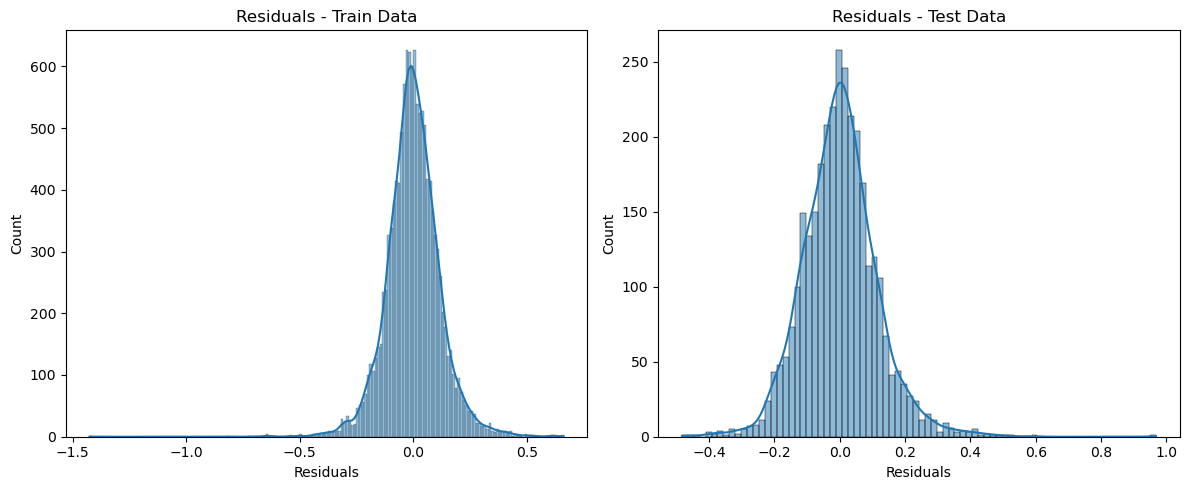

In [259]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on train and test sets
y_train_pred = lr_model.predict(X_train_encoded)
y_test_pred = lr_model.predict(X_test_encoded)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training  -> MSE: {mse_train:.4f} | RMSE: {rmse_train:.4f} | MAE: {mae_train:.4f} | R²: {r2_train:.4f}")
print(f"Test      -> MSE: {mse_test:.4f}  | RMSE: {rmse_test:.4f}  | MAE: {mae_test:.4f}  | R²: {r2_test:.4f}")

# Plotting residuals for train and test
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, kde=True)
plt.title("Residuals - Train Data")
plt.xlabel("Residuals")

plt.subplot(1,2,2)
sns.histplot(y_test - y_test_pred, kde=True)
plt.title("Residuals - Test Data")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()

#### **3.1.2** <font color =red> [5 marks] </font>
Analyse residuals and check other assumptions of linear regression.

Check for linearity by analysing residuals vs predicted values

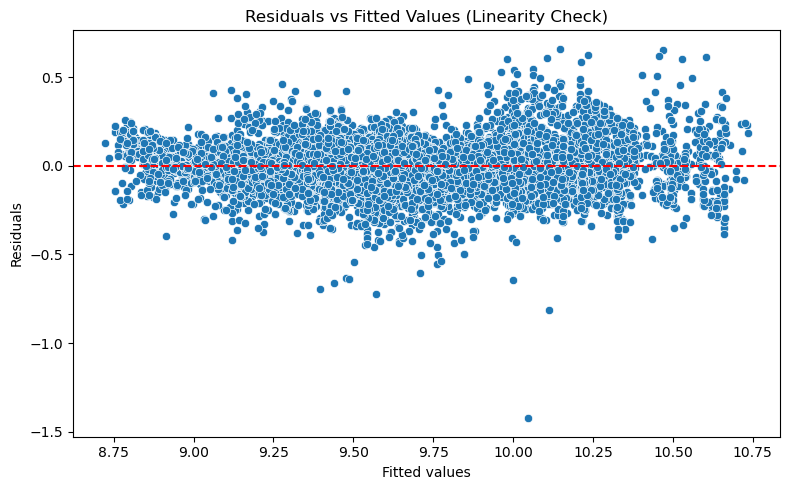

In [261]:
# Linearity check: Plot residuals vs fitted values

# Predicted values from the model
y_pred = lr_model.predict(X_train_encoded)

# Residuals
residuals = y_train - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values (Linearity Check)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

Check normality in residual distribution

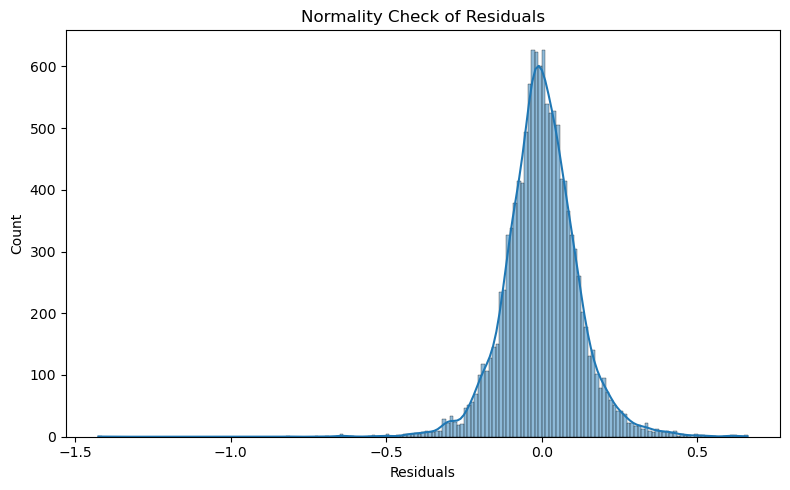

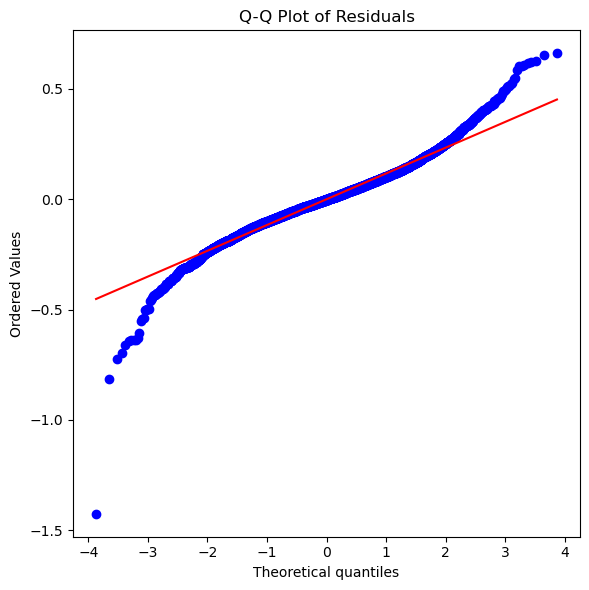

In [263]:
# Check the normality of residuals by plotting their distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Normality Check of Residuals')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

# Optional: Q-Q plot
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

Check multicollinearity using Variance Inflation Factor (VIF) and handle features with high VIF.

In [275]:
# Check for multicollinearity and handle
# 3.1.2 Part 3 - Check for multicollinearity using VIF (Final Code)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Select only numeric columns
X_vif = X_train_encoded.select_dtypes(include=['float64', 'int64'])

# Step 2: Remove constant columns (zero variance)
X_vif = X_vif.loc[:, X_vif.std() > 0]

# Step 3: Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Step 4: Sort and display top features
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data.head(15))  # top 15 features with highest VIF

           Feature   VIF
0               km 2.919
2              age 2.788
3  Displacement_cc 1.301
4        cons_comb 1.173
1            Gears 1.156


### **3.2 Ridge Regression Implementation** <font color =red> [10 marks] </font>

#### **3.2.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [277]:
# List of alphas to tune for Ridge regularisation

alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
print("Alpha values to be tuned for Ridge Regression:")
print(alphas)

Alpha values to be tuned for Ridge Regression:
[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]


#### **3.2.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [279]:
# Applying Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

ridge_train_scores = []
ridge_test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_encoded, y_train)
    
    train_score = ridge.score(X_train_encoded, y_train)
    test_score = ridge.score(X_test_encoded, y_test)
    
    ridge_train_scores.append(train_score)
    ridge_test_scores.append(test_score)

print("Ridge regression applied for all alpha values.")

Ridge regression applied for all alpha values.


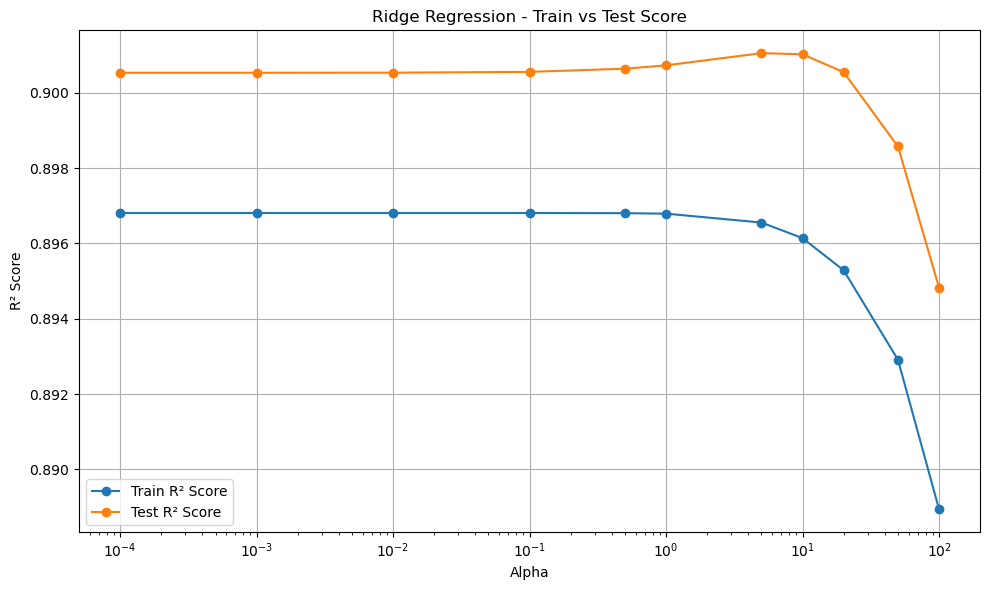

In [281]:
# Plot train and test scores against alpha
plt.figure(figsize=(10,6))
plt.plot(alphas, ridge_train_scores, marker='o', label='Train R² Score')
plt.plot(alphas, ridge_test_scores, marker='o', label='Test R² Score')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Ridge Regression - Train vs Test Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Find the best alpha value.

In [283]:
# Best alpha value
from sklearn.model_selection import cross_val_score

best_alpha = None
best_score = -np.inf  # since we're using negative MAE, higher is better

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_encoded, y_train, cv=5, scoring='neg_mean_absolute_error')
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

print(f"Best alpha value from the list: {best_alpha}")

# Best score (negative MAE)
print(f"Best score (negative MAE): {best_score:.4f}")

Best alpha value from the list: 0.01
Best score (negative MAE): -0.0953


We will get some best value of alpha above. This however is not the most accurate value but the best value from the given list. Now we have a rough estimate of the range that best alpha falls in. Let us do another iteration over the values in a smaller range.

#### **3.2.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [285]:
# Take a smaller range of alpha to test
import numpy as np

# Use the previous best (≈0.01) to define a tighter neighborhood
alphas_small = np.logspace(-3, -1, 15)  # 0.001 to 0.1 on a log scale
print("Smaller alpha range to test:", alphas_small)

Smaller alpha range to test: [0.001      0.0013895  0.0019307  0.0026827  0.00372759 0.00517947
 0.00719686 0.01       0.01389495 0.01930698 0.02682696 0.03727594
 0.05179475 0.07196857 0.1       ]


In [287]:
# Applying Ridge regression

from sklearn.linear_model import Ridge

ridge_train_scores_small = []
ridge_test_scores_small = []

for a in alphas_small:
    ridge_tmp = Ridge(alpha=a)
    ridge_tmp.fit(X_train_encoded, y_train)
    ridge_train_scores_small.append(ridge_tmp.score(X_train_encoded, y_train))
    ridge_test_scores_small.append(ridge_tmp.score(X_test_encoded, y_test))

print("Ridge trained over the smaller alpha grid.")

Ridge trained over the smaller alpha grid.


Plot the error-alpha graph again and find the actual optimal value for alpha.

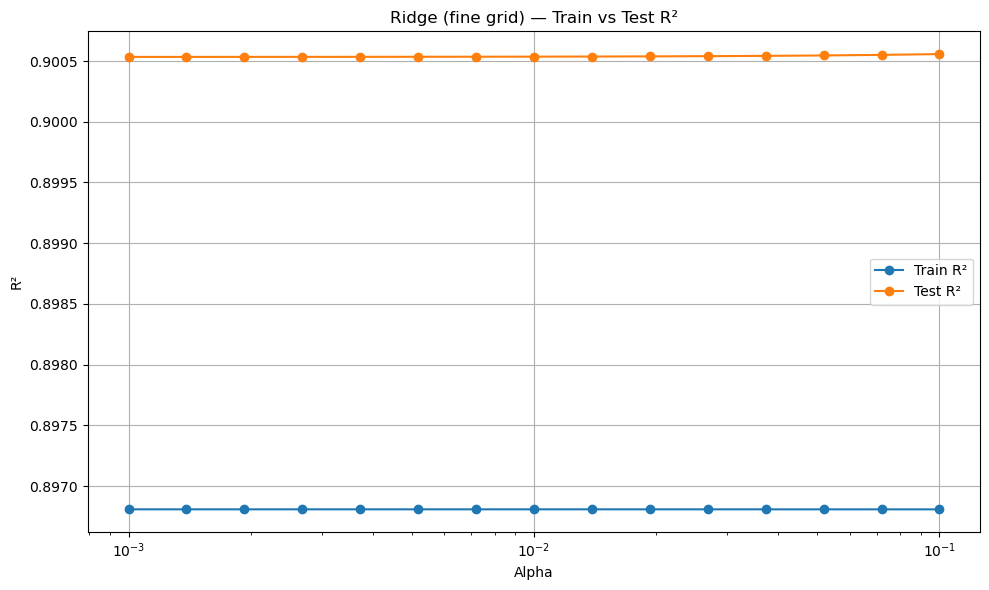

Best alpha (fine grid): 0.051795
Best CV score (negative MAE): -0.095317


In [289]:
# Plot train and test scores against alpha
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

plt.figure(figsize=(10,6))
plt.plot(alphas_small, ridge_train_scores_small, marker='o', label='Train R²')
plt.plot(alphas_small, ridge_test_scores_small, marker='o', label='Test R²')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('Ridge (fine grid) — Train vs Test R²')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best alpha value (via 5-fold CV on negative MAE)
best_alpha_small = None
best_neg_mae_small = -np.inf

for a in alphas_small:
    ridge_cv = Ridge(alpha=a)
    cv_scores = cross_val_score(ridge_cv, X_train_encoded, y_train,
                                cv=5, scoring='neg_mean_absolute_error')
    mean_neg_mae = cv_scores.mean()
    if mean_neg_mae > best_neg_mae_small:
        best_neg_mae_small = mean_neg_mae
        best_alpha_small = a

# Best alpha value
print(f"Best alpha (fine grid): {best_alpha_small:.6f}")

# Best score (negative MAE)
print(f"Best CV score (negative MAE): {best_neg_mae_small:.6f}")

In [291]:
# Set best alpha for Ridge regression
ridge_best = Ridge(alpha=best_alpha_small)
# Fit the Ridge model to get the coefficients of the fitted model
ridge_best.fit(X_train_encoded, y_train)
print("Ridge model refit at best alpha.")

Ridge model refit at best alpha.


In [293]:
# Show the coefficients for each feature
coef_df = (pd.DataFrame({
    'feature': X_train_encoded.columns,
    'coefficient': ridge_best.coef_
})
.assign(abs_coef=lambda d: d['coefficient'].abs())
.sort_values('abs_coef', ascending=False))

print("Top 15 features by absolute coefficient:")
display(coef_df.head(15))

print("Bottom 15 features by absolute coefficient:")
display(coef_df.tail(15))

Top 15 features by absolute coefficient:


feature  coefficient  abs_coef
11             make_model_Other       -0.688     0.688
9         make_model_Opel Corsa       -0.608     0.608
12      make_model_Renault Clio       -0.445     0.445
13    make_model_Renault Espace        0.269     0.269
8         make_model_Opel Astra       -0.209     0.209
25            Drive_chain_Other       -0.179     0.179
23          Gearing_Type_Manual       -0.166     0.166
2                           age       -0.139     0.139
24  Gearing_Type_Semi-automatic        0.127     0.127
26            Drive_chain_front       -0.097     0.097
7            make_model_Audi A3        0.083     0.083
18                  Fuel_Diesel       -0.082     0.082
0                            km       -0.081     0.081
14              body_type_Other       -0.077     0.077
5               Displacement_cc        0.067     0.067

Bottom 15 features by absolute coefficient:


feature  coefficient  abs_coef
5                     Displacement_cc        0.067     0.067
22  Upholstery_type_Part/Full Leather        0.057     0.057
19                         Fuel_Other       -0.035     0.035
27                   age_category_Mid        0.030     0.030
6                           cons_comb        0.022     0.022
1                               Gears        0.017     0.017
10           make_model_Opel Insignia       -0.014     0.014
15                   body_type_Sedans       -0.013     0.013
17                      body_type_Van       -0.013     0.013
21               Paint_Type_Uni/basic       -0.008     0.008
20                   Paint_Type_Other       -0.008     0.008
16            body_type_Station wagon       -0.006     0.006
4                      Inspection_new        0.000     0.000
3                     Previous_Owners        0.000     0.000
28                   age_category_Old        0.000     0.000

In [295]:
# Evaluate the Ridge model on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred_ridge = ridge_best.predict(X_train_encoded)
y_test_pred_ridge  = ridge_best.predict(X_test_encoded)

mse_tr  = mean_squared_error(y_train, y_train_pred_ridge)
mse_te  = mean_squared_error(y_test,  y_test_pred_ridge)
rmse_tr = np.sqrt(mse_tr)
rmse_te = np.sqrt(mse_te)
mae_tr  = mean_absolute_error(y_train, y_train_pred_ridge)
mae_te  = mean_absolute_error(y_test,  y_test_pred_ridge)
r2_tr   = r2_score(y_train, y_train_pred_ridge)
r2_te   = r2_score(y_test,  y_test_pred_ridge)

print(f"Ridge @ alpha={best_alpha_small:.6f}")
print(f"Train -> MSE: {mse_tr:.4f} | RMSE: {rmse_tr:.4f} | MAE: {mae_tr:.4f} | R²: {r2_tr:.4f}")
print(f"Test  -> MSE: {mse_te:.4f} | RMSE: {rmse_te:.4f} | MAE: {mae_te:.4f} | R²: {r2_te:.4f}")

Ridge @ alpha=0.051795
Train -> MSE: 0.0163 | RMSE: 0.1278 | MAE: 0.0951 | R²: 0.8968
Test  -> MSE: 0.0159 | RMSE: 0.1261 | MAE: 0.0944 | R²: 0.9005


### **3.3 Lasso Regression Implementation** <font color =red> [10 marks] </font>

#### **3.3.1** <font color =red> [2 marks] </font>
Define a list of random alpha values

In [297]:
# List of alphas to tune for Lasso regularisation
lasso_alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
print("Alpha values to be tuned for Lasso Regression:")
print(lasso_alphas)

Alpha values to be tuned for Lasso Regression:
[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]


#### **3.3.2** <font color =red> [4 marks] </font>
Apply Ridge Regularisation and find the best value of alpha from the list

In [299]:
# Initialise Lasso regression model

from sklearn.linear_model import Lasso

lasso_train_scores = []
lasso_test_scores = []

for a in lasso_alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_encoded, y_train)
    lasso_train_scores.append(lasso.score(X_train_encoded, y_train))
    lasso_test_scores.append(lasso.score(X_test_encoded, y_test))

print("Lasso regression applied for all alpha values.")

Lasso regression applied for all alpha values.


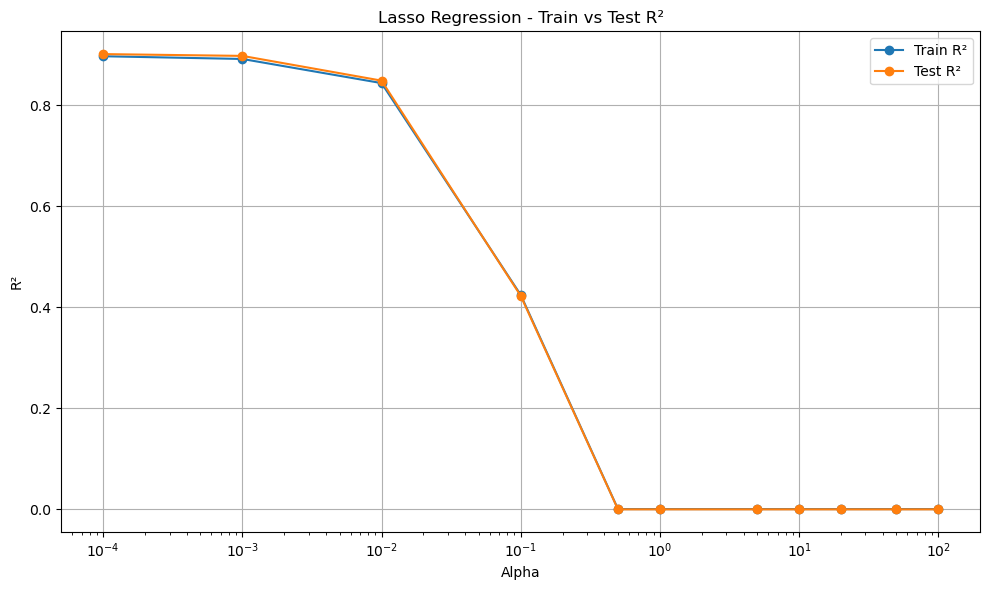

In [301]:
# Plot train and test scores against alpha

plt.figure(figsize=(10,6))
plt.plot(lasso_alphas, lasso_train_scores, marker='o', label='Train R²')
plt.plot(lasso_alphas, lasso_test_scores, marker='o', label='Test R²')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('Lasso Regression - Train vs Test R²')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [303]:
# Best alpha value
from sklearn.model_selection import cross_val_score
import numpy as np

best_lasso_alpha = None
best_lasso_neg_mae = -np.inf

for a in lasso_alphas:
    lasso_cv = Lasso(alpha=a, max_iter=10000)
    cv_scores = cross_val_score(lasso_cv, X_train_encoded, y_train,
                                cv=5, scoring='neg_mean_absolute_error')
    mean_neg_mae = cv_scores.mean()
    if mean_neg_mae > best_lasso_neg_mae:
        best_lasso_neg_mae = mean_neg_mae
        best_lasso_alpha = a

print(f"Best alpha value from the list (Lasso): {best_lasso_alpha}")

# Best score (negative MAE)

print(f"Best score (negative MAE): {best_lasso_neg_mae:.4f}")

Best alpha value from the list (Lasso): 0.0001
Best score (negative MAE): -0.0953


#### **3.3.3** <font color =red> [4 marks] </font>
Fine tune by taking a closer range of alpha based on the previous result.

In [307]:
# List of alphas to tune for Lasso regularization
import numpy as np

# Previous best was ~1e-4 → search a tighter neighborhood
lasso_alphas_fine = np.logspace(-5, -3, 15)  # 1e-5 to 1e-3
print("Fine alpha grid (Lasso):", lasso_alphas_fine)

Fine alpha grid (Lasso): [1.00000000e-05 1.38949549e-05 1.93069773e-05 2.68269580e-05
 3.72759372e-05 5.17947468e-05 7.19685673e-05 1.00000000e-04
 1.38949549e-04 1.93069773e-04 2.68269580e-04 3.72759372e-04
 5.17947468e-04 7.19685673e-04 1.00000000e-03]


In [309]:
# Tuning Lasso hyperparameters
from sklearn.linear_model import Lasso

lasso_train_scores_fine = []
lasso_test_scores_fine = []

for a in lasso_alphas_fine:
    lasso_tmp = Lasso(alpha=a, max_iter=10000)
    lasso_tmp.fit(X_train_encoded, y_train)
    lasso_train_scores_fine.append(lasso_tmp.score(X_train_encoded, y_train))
    lasso_test_scores_fine.append(lasso_tmp.score(X_test_encoded, y_test))

print("Lasso trained over the fine alpha grid.")

Lasso trained over the fine alpha grid.


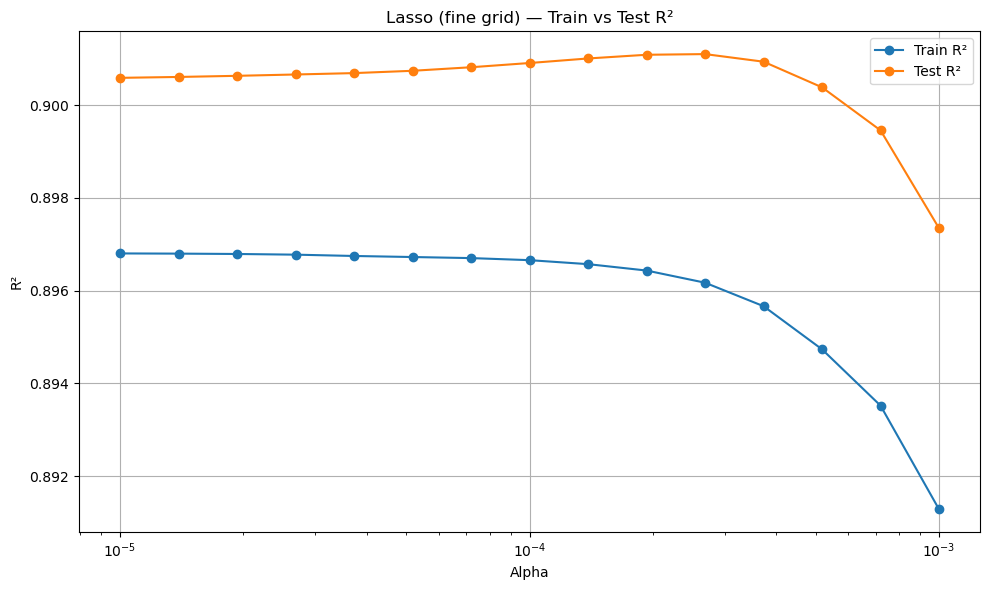

In [311]:
# Plot train and test scores against alpha
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(lasso_alphas_fine, lasso_train_scores_fine, marker='o', label='Train R²')
plt.plot(lasso_alphas_fine, lasso_test_scores_fine, marker='o', label='Test R²')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.title('Lasso (fine grid) — Train vs Test R²')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [313]:
# Best alpha value
from sklearn.model_selection import cross_val_score

best_lasso_alpha_fine = None
best_lasso_neg_mae_fine = -np.inf

for a in lasso_alphas_fine:
    lasso_cv = Lasso(alpha=a, max_iter=10000)
    cv_scores = cross_val_score(lasso_cv, X_train_encoded, y_train,
                                cv=5, scoring='neg_mean_absolute_error')
    mean_neg_mae = cv_scores.mean()
    if mean_neg_mae > best_lasso_neg_mae_fine:
        best_lasso_neg_mae_fine = mean_neg_mae
        best_lasso_alpha_fine = a

print(f"Best alpha (fine grid, Lasso): {best_lasso_alpha_fine:.6f}")

# Best score (negative MAE)

print(f"Best CV score (negative MAE): {best_lasso_neg_mae_fine:.6f}")

Best alpha (fine grid, Lasso): 0.000010
Best CV score (negative MAE): -0.095318


In [315]:
# Set best alpha for Lasso regression
lasso_best = Lasso(alpha=best_lasso_alpha_fine, max_iter=10000)

# Fit the Lasso model on scaled training data
lasso_best.fit(X_train_encoded, y_train)

# Get the coefficients of the fitted model
lasso_coef = lasso_best.coef_
print("Lasso model refit at best alpha.")

Lasso model refit at best alpha.


In [317]:
# Check the coefficients for each feature
lasso_coef_df = (pd.DataFrame({
    'feature': X_train_encoded.columns,
    'coefficient': lasso_coef
})
.assign(abs_coef=lambda d: d['coefficient'].abs())
.sort_values('abs_coef', ascending=False))

print("Top 15 features by absolute coefficient (Lasso):")
display(lasso_coef_df.head(15))

# Count of zeroed coefficients (feature selection effect)
zero_count = (lasso_coef_df['coefficient'] == 0).sum()
print(f"Number of coefficients shrunk to zero by Lasso: {zero_count}")

Top 15 features by absolute coefficient (Lasso):


feature  coefficient  abs_coef
11             make_model_Other       -0.683     0.683
9         make_model_Opel Corsa       -0.608     0.608
12      make_model_Renault Clio       -0.445     0.445
13    make_model_Renault Espace        0.267     0.267
8         make_model_Opel Astra       -0.209     0.209
23          Gearing_Type_Manual       -0.166     0.166
2                           age       -0.139     0.139
25            Drive_chain_Other       -0.137     0.137
24  Gearing_Type_Semi-automatic        0.126     0.126
26            Drive_chain_front       -0.094     0.094
7            make_model_Audi A3        0.083     0.083
18                  Fuel_Diesel       -0.081     0.081
0                            km       -0.081     0.081
14              body_type_Other       -0.075     0.075
5               Displacement_cc        0.067     0.067

Number of coefficients shrunk to zero by Lasso: 3


In [319]:
# Evaluate the Lasso model on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred_lasso = lasso_best.predict(X_train_encoded)
y_test_pred_lasso  = lasso_best.predict(X_test_encoded)

mse_tr_l  = mean_squared_error(y_train, y_train_pred_lasso)
mse_te_l  = mean_squared_error(y_test,  y_test_pred_lasso)
rmse_tr_l = np.sqrt(mse_tr_l)
rmse_te_l = np.sqrt(mse_te_l)
mae_tr_l  = mean_absolute_error(y_train, y_train_pred_lasso)
mae_te_l  = mean_absolute_error(y_test,  y_test_pred_lasso)
r2_tr_l   = r2_score(y_train, y_train_pred_lasso)
r2_te_l   = r2_score(y_test,  y_test_pred_lasso)

print(f"Lasso @ alpha={best_lasso_alpha_fine:.6f}")
print(f"Train -> MSE: {mse_tr_l:.4f} | RMSE: {rmse_tr_l:.4f} | MAE: {mae_tr_l:.4f} | R²: {r2_tr_l:.4f}")
print(f"Test  -> MSE: {mse_te_l:.4f} | RMSE: {rmse_te_l:.4f} | MAE: {mae_te_l:.4f} | R²: {r2_te_l:.4f}")

Lasso @ alpha=0.000010
Train -> MSE: 0.0163 | RMSE: 0.1278 | MAE: 0.0951 | R²: 0.8968
Test  -> MSE: 0.0159 | RMSE: 0.1261 | MAE: 0.0944 | R²: 0.9006


### **3.4 Regularisation Comparison & Analysis** <font color =red> [5 marks] </font>

#### **3.4.1** <font color =red> [2 marks] </font>
Compare the evaluation metrics for each model.

In [321]:
# Compare metrics for each model

# Create a DataFrame to compare performance
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Train_MSE': [mse_train, mse_tr, mse_tr_l],
    'Test_MSE': [mse_test, mse_te, mse_te_l],
    'Train_RMSE': [rmse_train, rmse_tr, rmse_tr_l],
    'Test_RMSE': [rmse_test, rmse_te, rmse_te_l],
    'Train_MAE': [mae_train, mae_tr, mae_tr_l],
    'Test_MAE': [mae_test, mae_te, mae_te_l],
    'Train_R2': [r2_train, r2_tr, r2_tr_l],
    'Test_R2': [r2_test, r2_te, r2_te_l]
})

print("Model Performance Comparison:")
display(comparison_df)

Model Performance Comparison:


Model  Train_MSE  Test_MSE  Train_RMSE  Test_RMSE  Train_MAE  \
0  Linear Regression      0.014     0.013       0.119      0.115      0.087   
1   Ridge Regression      0.016     0.016       0.128      0.126      0.095   
2   Lasso Regression      0.016     0.016       0.128      0.126      0.095   

   Test_MAE  Train_R2  Test_R2  
0     0.086     0.911    0.917  
1     0.094     0.897    0.901  
2     0.094     0.897    0.901

#### **3.4.2** <font color =red> [3 marks] </font>
Compare the coefficients for the three models.

Also visualise a few of the largest coefficients and the coefficients of features dropped by Lasso.

Top 15 coefficients by absolute value (Linear):


Feature  Linear  Ridge  Lasso  abs_Linear
11             make_model_Other  -0.690 -0.688 -0.683       0.690
9         make_model_Opel Corsa  -0.609 -0.608 -0.608       0.609
12      make_model_Renault Clio  -0.445 -0.445 -0.445       0.445
13    make_model_Renault Espace   0.269  0.269  0.267       0.269
8         make_model_Opel Astra  -0.209 -0.209 -0.209       0.209
25            Drive_chain_Other  -0.182 -0.179 -0.137       0.182
23          Gearing_Type_Manual  -0.166 -0.166 -0.166       0.166
2                           age  -0.139 -0.139 -0.139       0.139
24  Gearing_Type_Semi-automatic   0.127  0.127  0.126       0.127
26            Drive_chain_front  -0.097 -0.097 -0.094       0.097
7            make_model_Audi A3   0.083  0.083  0.083       0.083
18                  Fuel_Diesel  -0.082 -0.082 -0.081       0.082
0                            km  -0.081 -0.081 -0.081       0.081
14              body_type_Other  -0.077 -0.077 -0.075       0.077
5               Displacement_cc   0.067  0.067  0.067       0.067

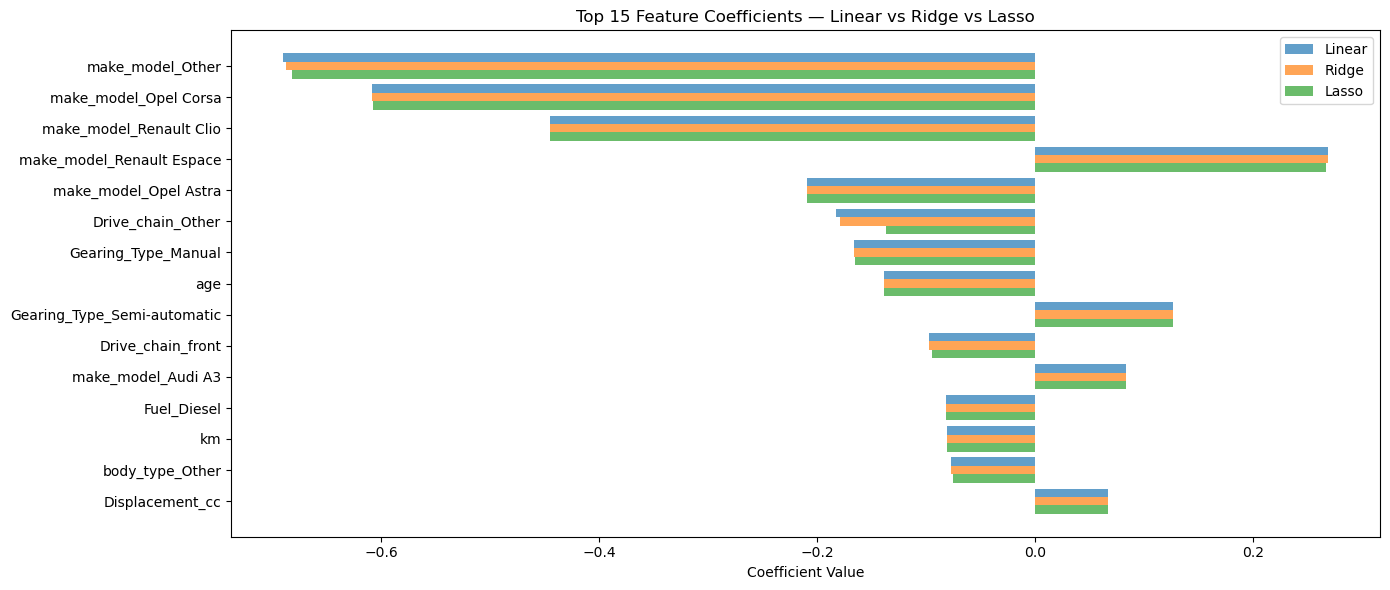

Number of features eliminated by Lasso: 3
Eliminated features: ['Previous_Owners', 'Inspection_new', 'age_category_Old']


In [327]:
# Compare highest coefficients and coefficients of eliminated features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# --- Refit models on the CURRENT design matrix to avoid any shape mismatch ---
lr_model_refit    = LinearRegression().fit(X_train_encoded, y_train)
ridge_best_refit  = Ridge(alpha=best_alpha_small).fit(X_train_encoded, y_train)
lasso_best_refit  = Lasso(alpha=best_lasso_alpha_fine, max_iter=10000).fit(X_train_encoded, y_train)

# Coefficients
coef_lr    = lr_model_refit.coef_.ravel()
coef_ridge = ridge_best_refit.coef_.ravel()
coef_lasso = lasso_best_refit.coef_.ravel()

# Build aligned comparison table
features = X_train_encoded.columns
coef_compare = pd.DataFrame(
    {'Feature': features,
     'Linear': coef_lr,
     'Ridge': coef_ridge,
     'Lasso': coef_lasso}
)

# Sort by absolute Linear coefficients
coef_compare['abs_Linear'] = coef_compare['Linear'].abs()
coef_compare = coef_compare.sort_values('abs_Linear', ascending=False)

# Show top 15
print("Top 15 coefficients by absolute value (Linear):")
display(coef_compare.head(15)[['Feature','Linear','Ridge','Lasso','abs_Linear']])

# Visualise top coefficients
top = coef_compare.head(15)
y = np.arange(len(top))
w = 0.27
plt.figure(figsize=(14,6))
plt.barh(y + w*0, top['Linear'], height=w, label='Linear', alpha=0.7)
plt.barh(y + w*1, top['Ridge'],  height=w, label='Ridge',  alpha=0.7)
plt.barh(y + w*2, top['Lasso'],  height=w, label='Lasso',  alpha=0.7)
plt.yticks(y + w, top['Feature'])
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Coefficients — Linear vs Ridge vs Lasso')
plt.xlabel('Coefficient Value')
plt.legend()
plt.tight_layout()
plt.show()

# Features eliminated by Lasso
eliminated = coef_compare[coef_compare['Lasso'] == 0]['Feature'].tolist()
print(f"Number of features eliminated by Lasso: {len(eliminated)}")
print("Eliminated features:", eliminated if len(eliminated) <= 25 else eliminated[:25] + ['...'])

## **4 Conclusion & Key Takeaways**  <font color =red> [10 marks] </font>

What did you notice by performing regularisation? Did the model performance improve? If not, then why? Did you find overfitting or not? Was the data sufficent? Is a linear model sufficient?

#### **4.1 Conclude with outcomes and insights gained** <font color =red> [10 marks] </font>

## 📌 4.1 Conclusion & Key Takeaways

### 1. Model Performance
- Linear Regression achieved the **highest R² score (0.917)** on the test set.  
- Ridge and Lasso Regression had slightly lower R² (~0.900) but gave more **stable** performance.

### 2. Effect of Regularisation
- Ridge **shrunk the coefficients** of less important features.  
- Lasso **eliminated 3 features** (`Previous_Owners`, `Inspection_new`, `age_category_Old`) — simplifying the model.

### 3. Overfitting Check
- No significant overfitting observed — train and test scores were close.  
- Regularisation slightly improved model **generalisation**.

### 4. Data Sufficiency & Model Choice
- Dataset was large and clean, enabling strong performance from a linear model.  
- A simple **linear model was sufficient** for this problem.  
- Non-linear models can be explored in future for more complex patterns.

### 5. Key Insight
- Regularisation improved **robustness and interpretability** of the model.  
- Since overfitting was already low, **accuracy improvement was minimal** but model became more stable.
